# [Amazon CloudWatch](https://docs.aws.amazon.com/cloudwatch/)

- Monitors state and utilization of most resources that you can manage under AWS

- **CloudWatch agent** collects system-level metrics:
    - EC2 instances

    - On-premises servers

- CloudWatch retention schedules
    - 1-minute data point available for 15 days

    - 5-minute data points available for 63 days
    - 1-hour data points available for 455 days

## CloudWatch Actions

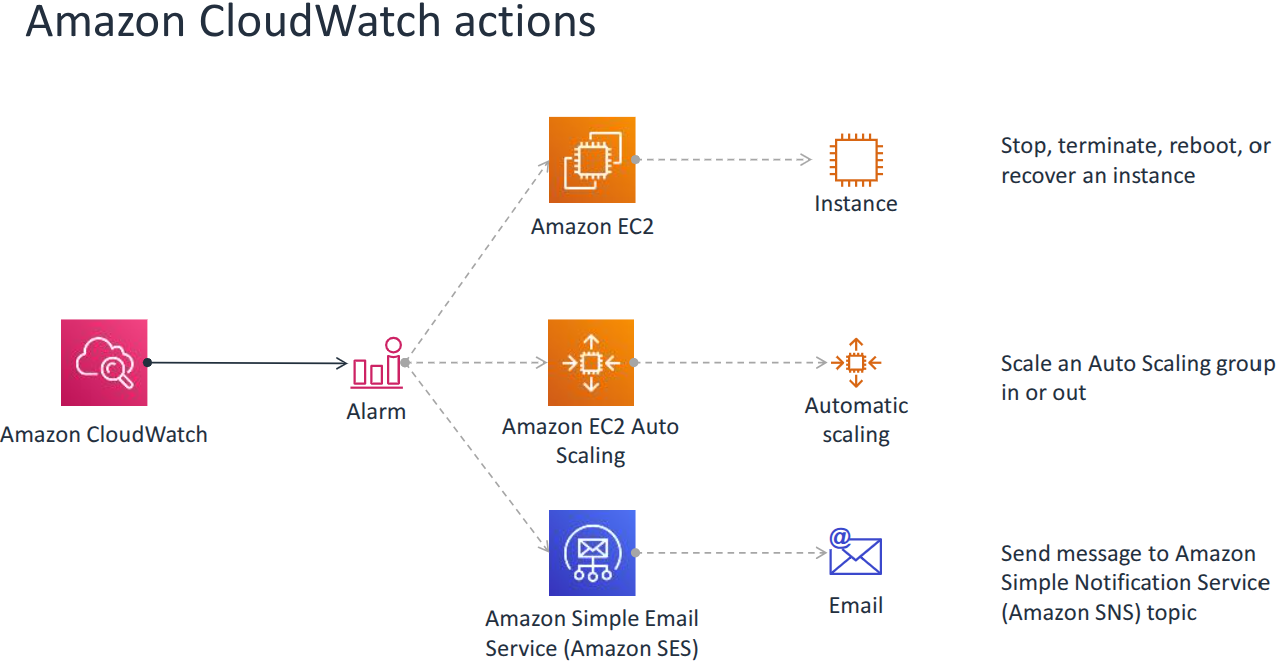

## CloudWatch Alarms

- Test a selected metric agains specific threshold

- **ALARM** state is not necessarily an emergency condition

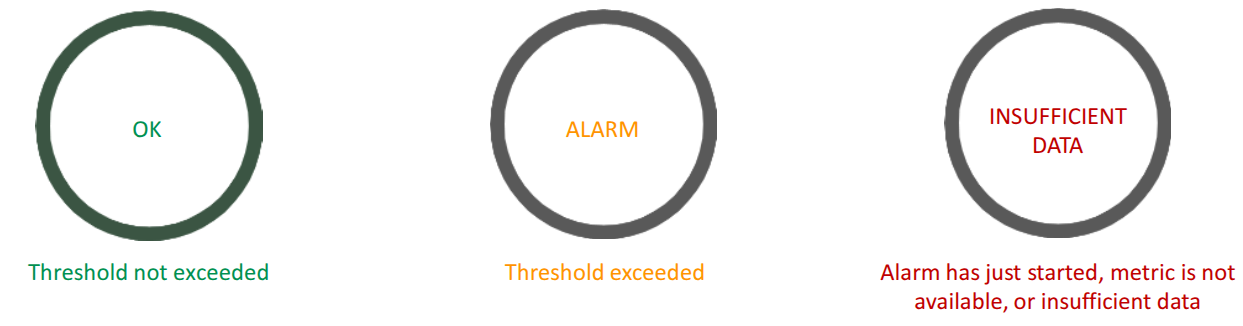

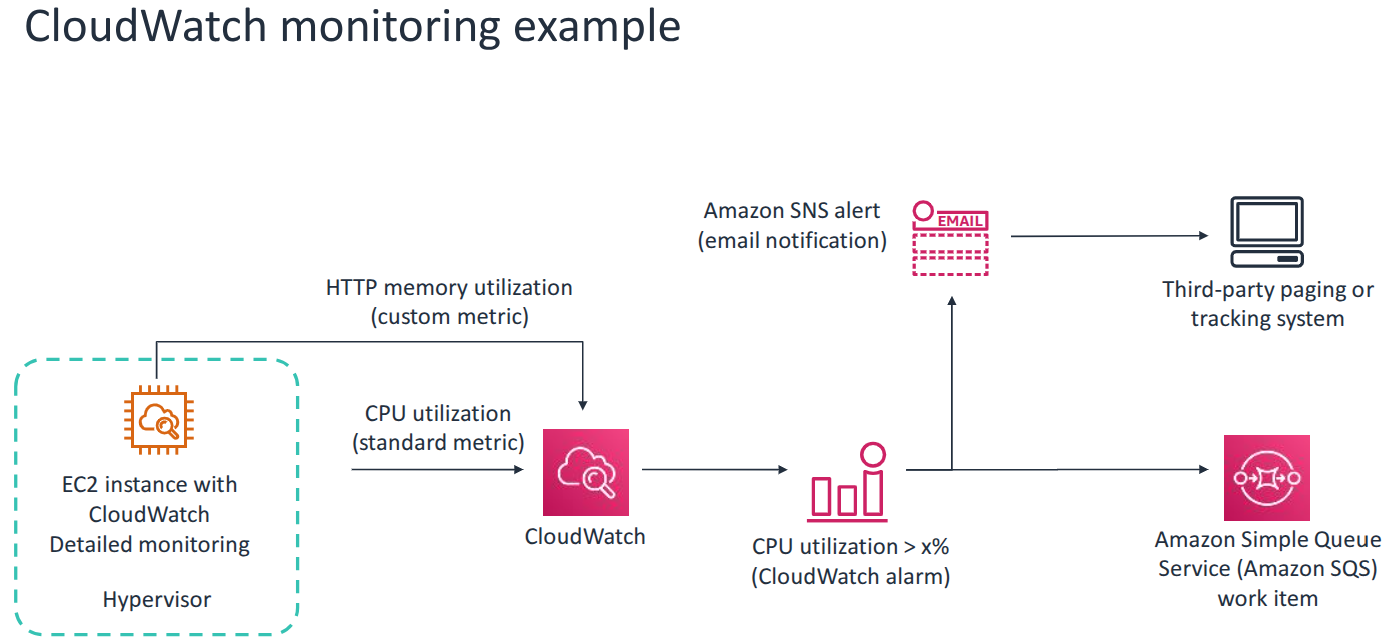

### ClouWatch Alarms Example

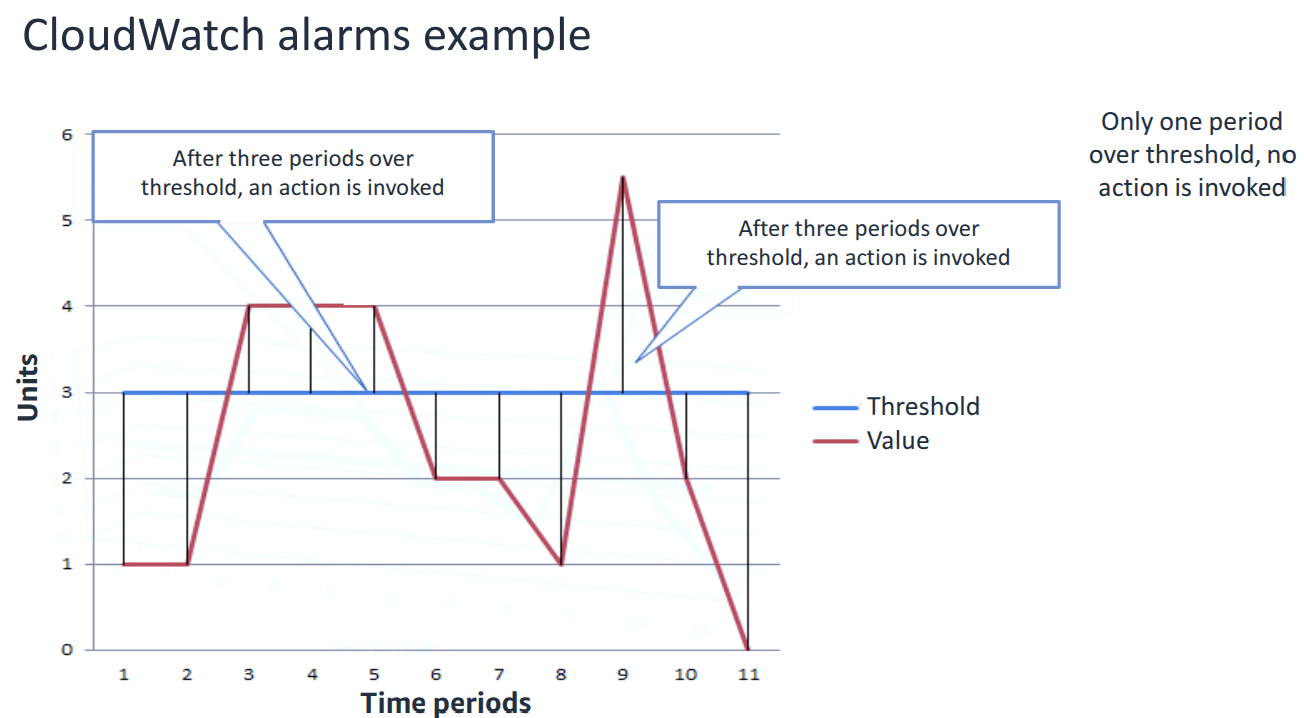

See also [Using CloudWatch Alarms](https://docs.aws.amazon.com/AmazonCloudWatch/latest/monitoring/AlarmThatSendsEmail.html).

## Metrics

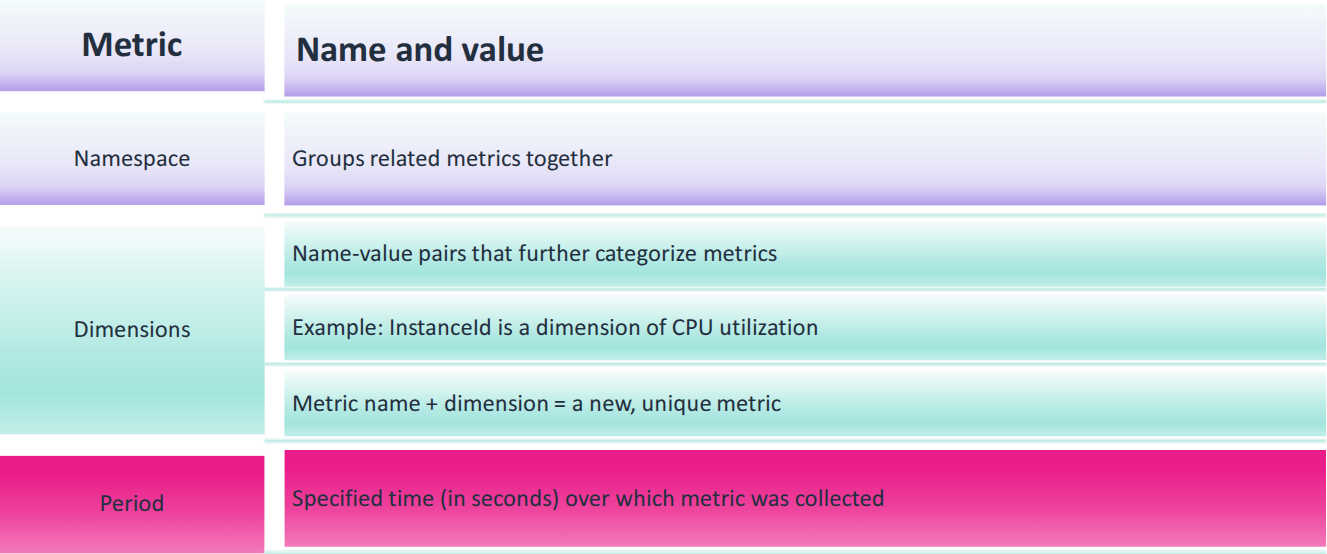

- Metrics in different **namespaces** are isolated from each other, so that metrics from different applications are not mistakenly aggregated into the same statistics. 
    - The AWS namespaces use the naming convention *AWS/\<service\>*. For example, Amazon EC2 uses the AWS/EC2namespace.

- You can assign up to 10 dimensions to a metric.

- Each metric has specific characteristics that describe it, and you can think of dimensions as categories for those characteristics. 
    - Dimensions help you design a structure for your statistics plan. 
    
    - when you search for metrics, you can get statistics for a particular EC2 instance by specifying theInstanceIddimension.


- You can adjust how the data is aggregated by varying the length of the period. A period can be as short as 1 second or as long as 1 day (86,400 seconds). 

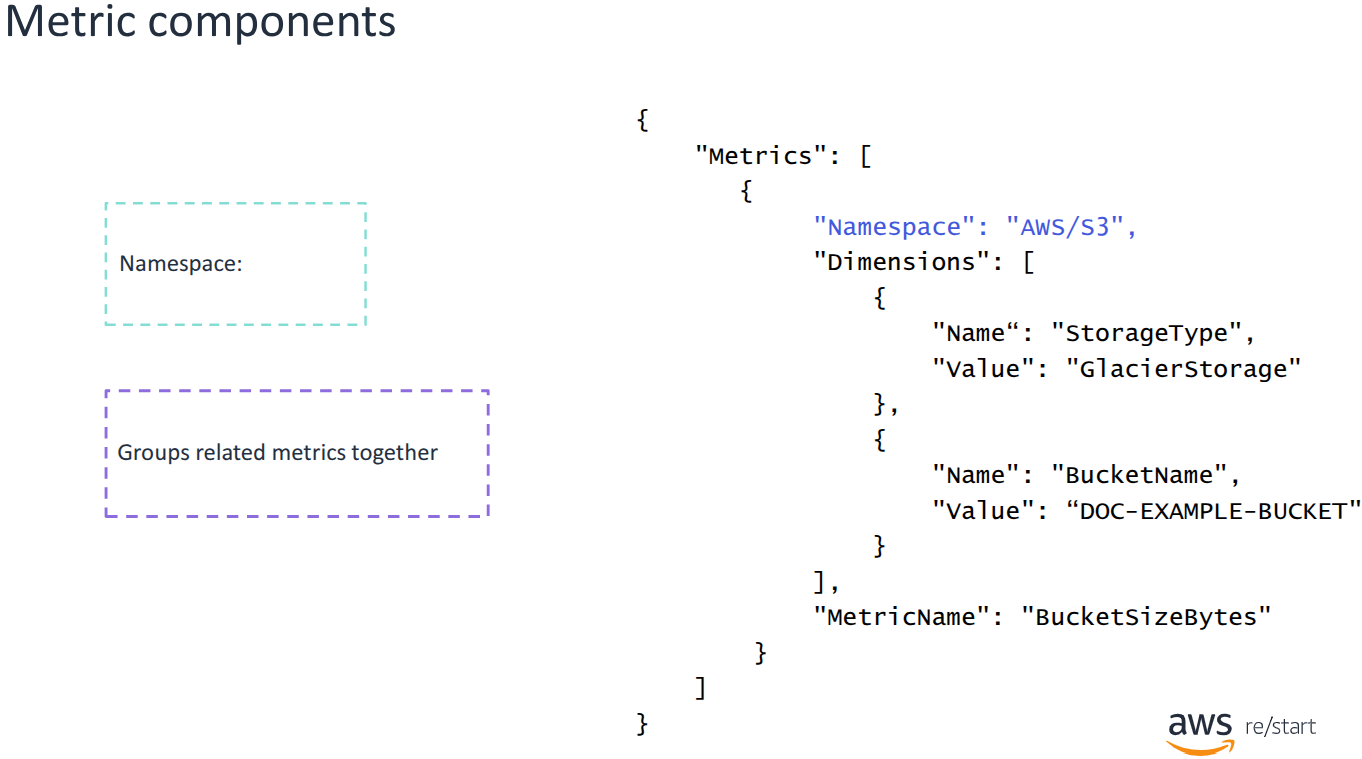

- List metrics in an AWS service

```bash
aws cloudwatch list-metrics --namespace AWS/S3
```

- Standard CloudWatch metrics are grouped by service. 
- Metrics cannot be deleted, but they automatically expire after 15 months if no new data is published to them.

## Standard and Custom Metrics

### Standard Metrics

- Grouped by service name

- Display graphically so that selected metrics can be compared

- Only appear if you have used the service in the past 15 months

- Reachable programmatically through the AWS Command Line Interface (AWS CLI) or application programming interface (API)

### Custom Metrics

- Grouped by user-defined namespaces

- Publish to CloudWatch using the AWS CLI, an API, or a CloudWatch agent

## CloudWatch Dashboards

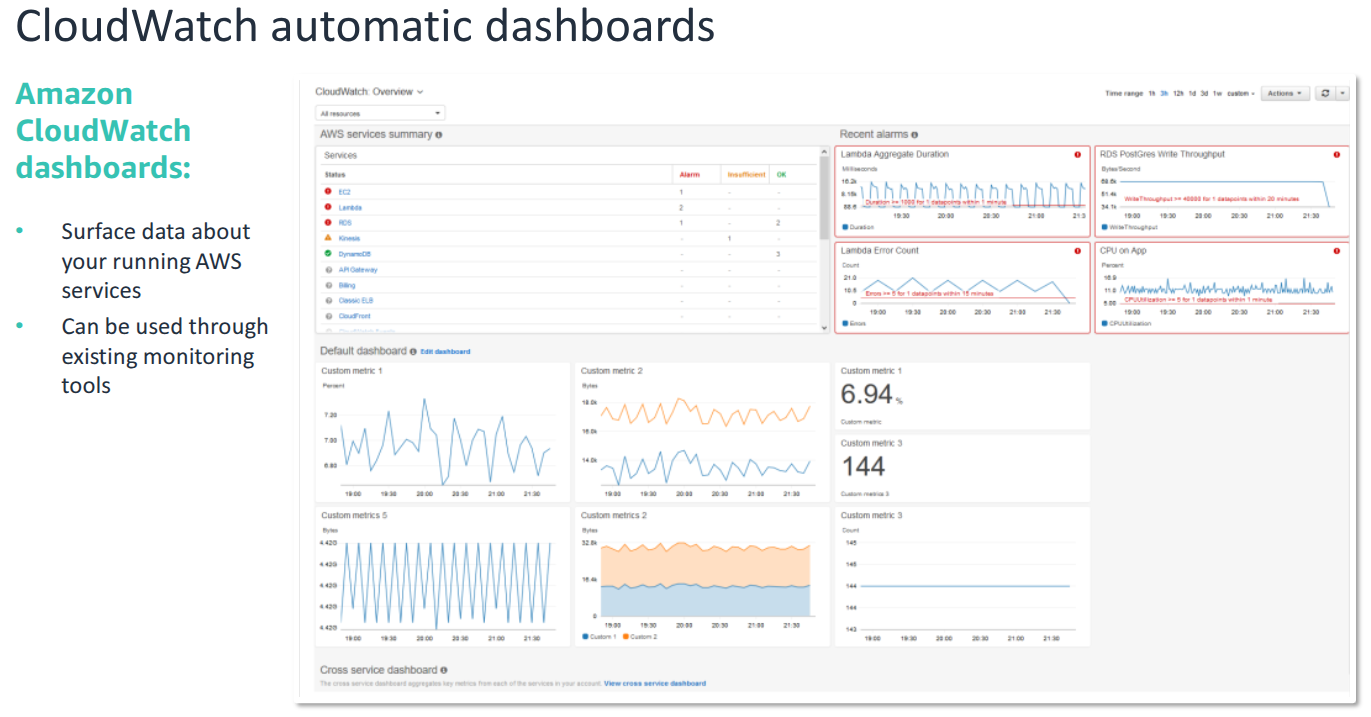

## CloudWatch Events

- Delivers a near real-time stream of system events that describe changes in AWS resources.

- You can use CloudWatch Events to schedule automated actions that self-trigger at certain times by using cron or rate expressions.

See [Scheduled Events and Scheduled Expressions](https://docs.aws.amazon.com/lambda/latest/dg/tutorial-scheduled-events-schedule-expressions.html.)

### Some Concepts

- **Events** - Indicates change in AWS enviironment. 
    - You can generate custom application-level events and publish them to CloudWatch Events. 
    
    - You can also set up scheduled events that are generated on a periodic basis. 

- **Targets** - Processes events. These include EC2, Lambda funcs, SNS topics, SQS queuues
- **Rules** - Matches incoming events and routes them to targets for processing.
    - A single rule can route to multiple targets, all are processed in parallel.

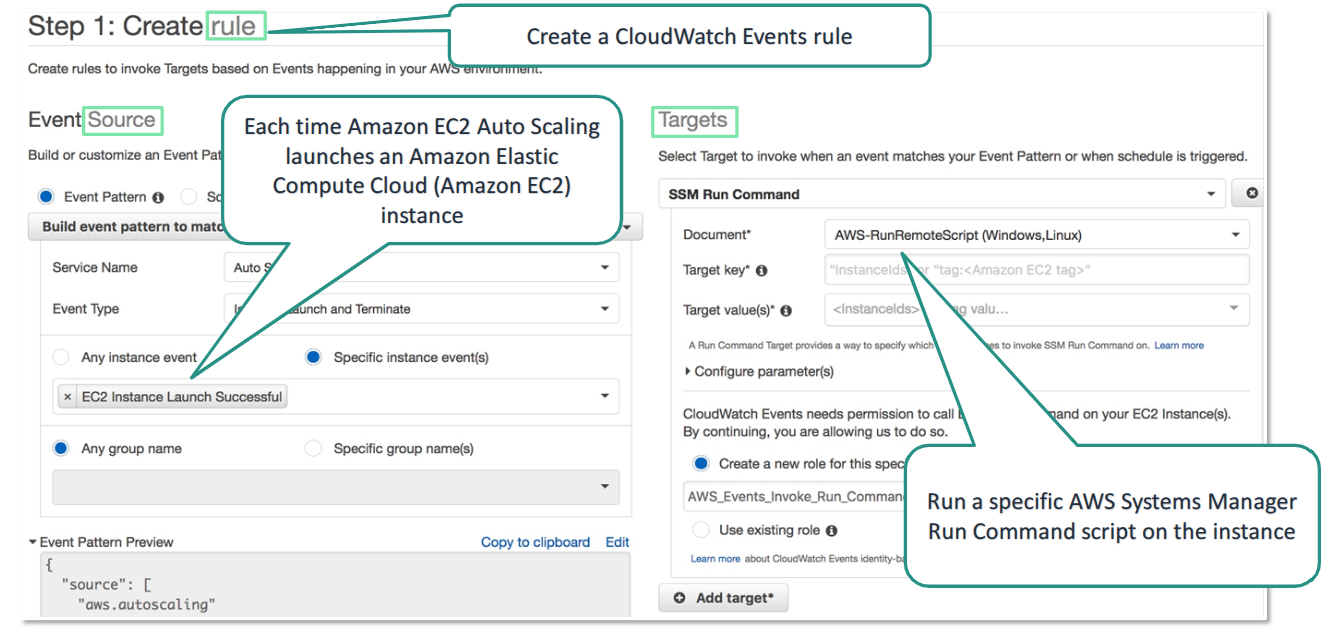

In theexample, a CloudWatch Event ruleis being created. Here, each time a new instance is created, an AWS Systems Manager Run Command script is run on the instance.

## Amazon CloudWatch Logs

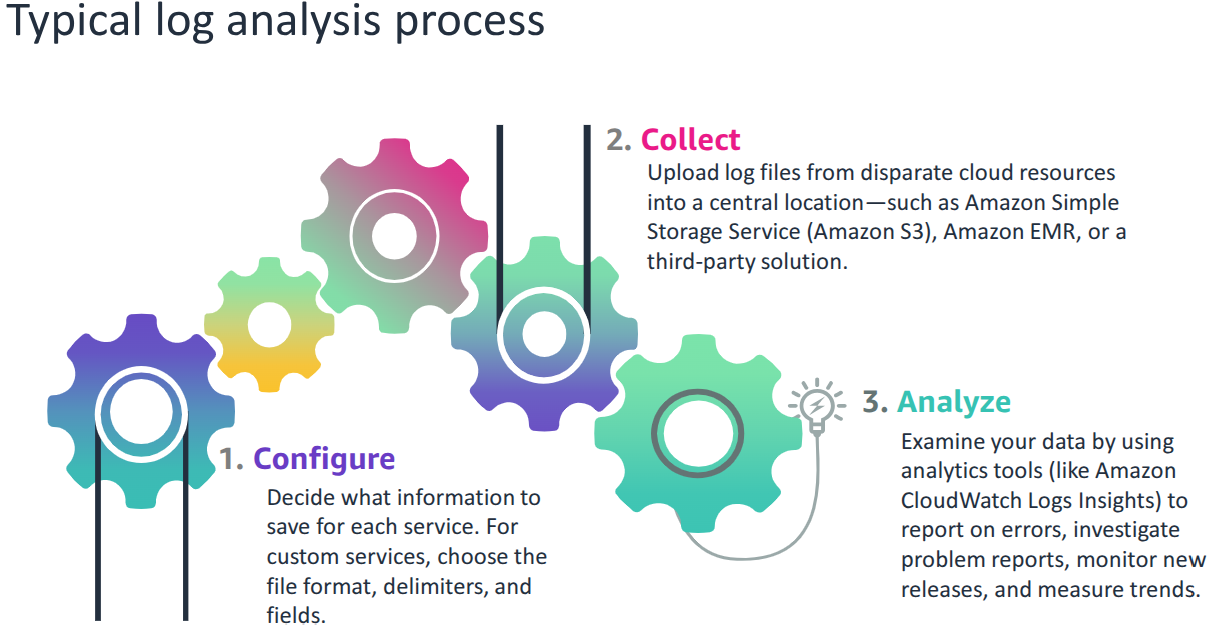

1. **Configure** - Decide what information you need to capture in your logs, and where and how it will be stored.

2. **Collect** - Instances are provisioned and removed in a cloud environment. You need a strategy for periodically uploading a server’s log files so that this valuable information is not lost when an instance is eventually terminated.
3. **Analyze** - Using log data gives you greater visibility into the daily health of your systems.

### CloudWatch Logs Functionality

- Automatically collecting logs—for example, from EC2 instances
 
- Aggregating data into log groups
- Being able to configure metric filterson a log group –
    - Looking for specific string patterns.

    - Have each match increment a custom CloudWatch metric.
    - Use metric to ccreate CloudWatch alarms or send notifications.
- Querying logs and creatiing visualizations wiith **CloudWatch Logs Insights**
    - CloudWatch Logs Insights is a part of the CloudWatc|h service that provides a purpose-built query language with a few simple, but powerful, commands. 

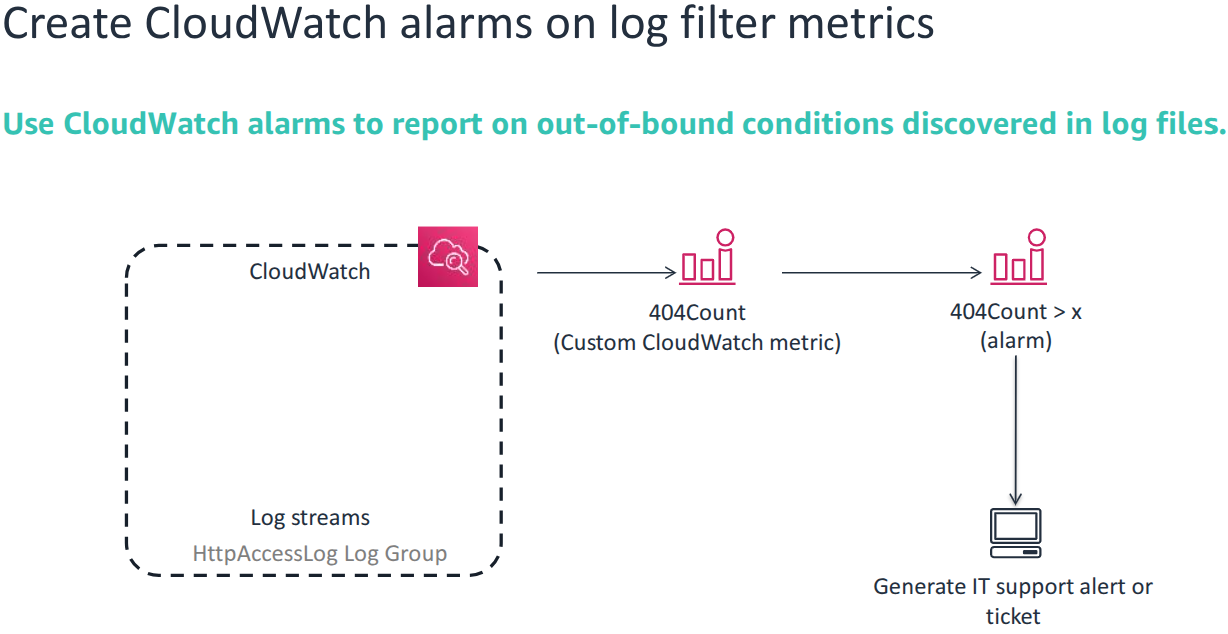

In the diagram,the following processes occur:

1. A CloudWatch log group that is named HttpAccessLogcontains aggregated log data. The log data is collected by the CloudWatch agentsthat are installed on one or more EC2 instances. 

2. An administrator then creates a custom CloudWatch filter on the log group. The filter searches the log data for 404page not found HTTP error messages in the log. 
3. Each match increments a custom CloudWatch metric for the 404Countmetric. 
4. The administrator then uses that metric to trigger a CloudWatch alarm when the 404Countmetric exceeds a specified value (which is shown as x). 
5. When the CloudWatch alarm is triggered, a notification is sent—in this case, the notification goes to the IT support team. 

### Typcial log formats

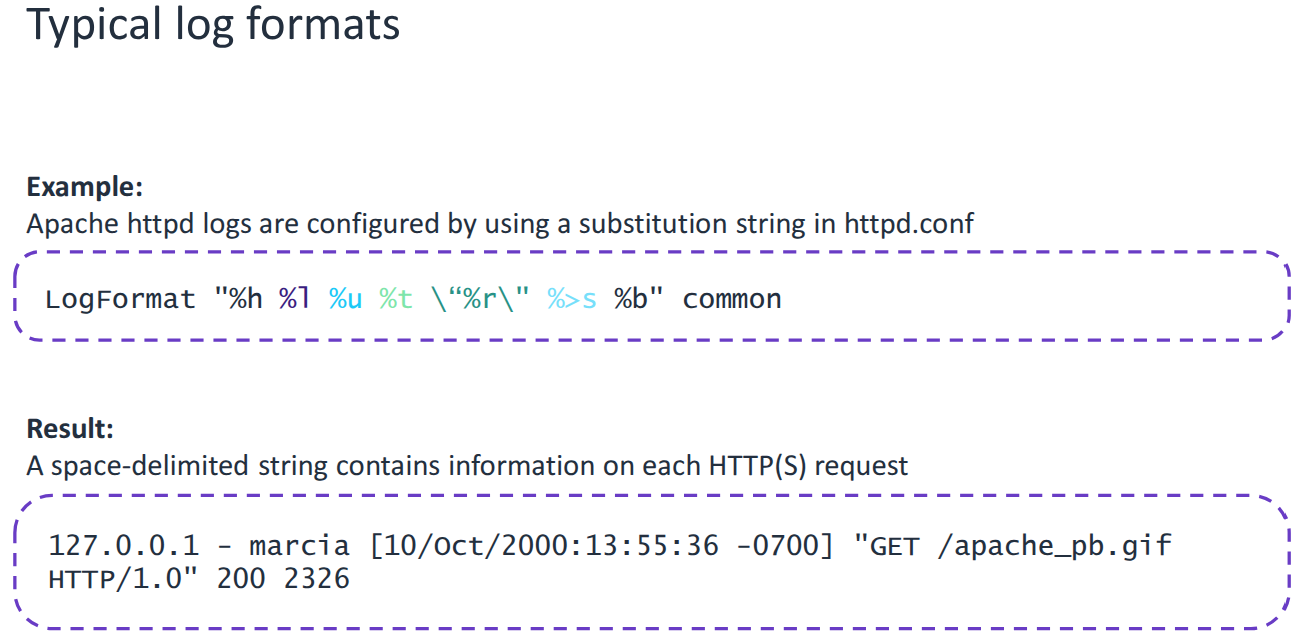

- `%h` is the IP Address of host

- `%l` is the identity of the machine
- `%u` user IID of person who requested
- `%t` time the request was received
- `%r` request line. Includes type of HTTP request received, resouurce requested.
- `%s` status code
- `%b` records size of objecct

### Filter Patterns

Case-sensitive

- Multiple terms are allowed in a metrics filter pattern

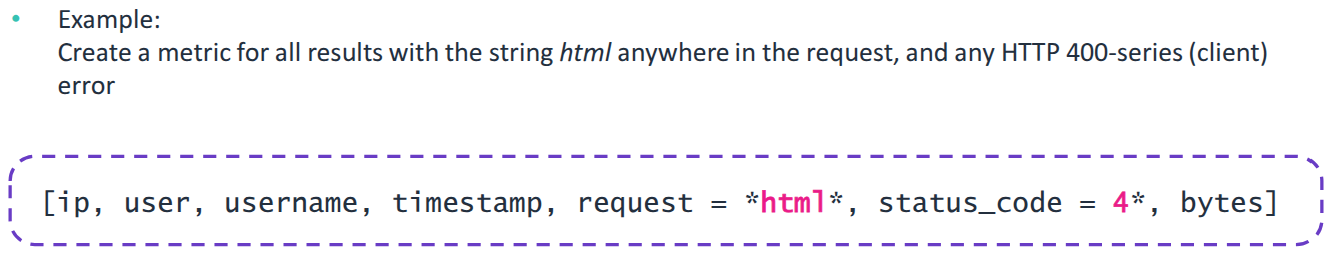

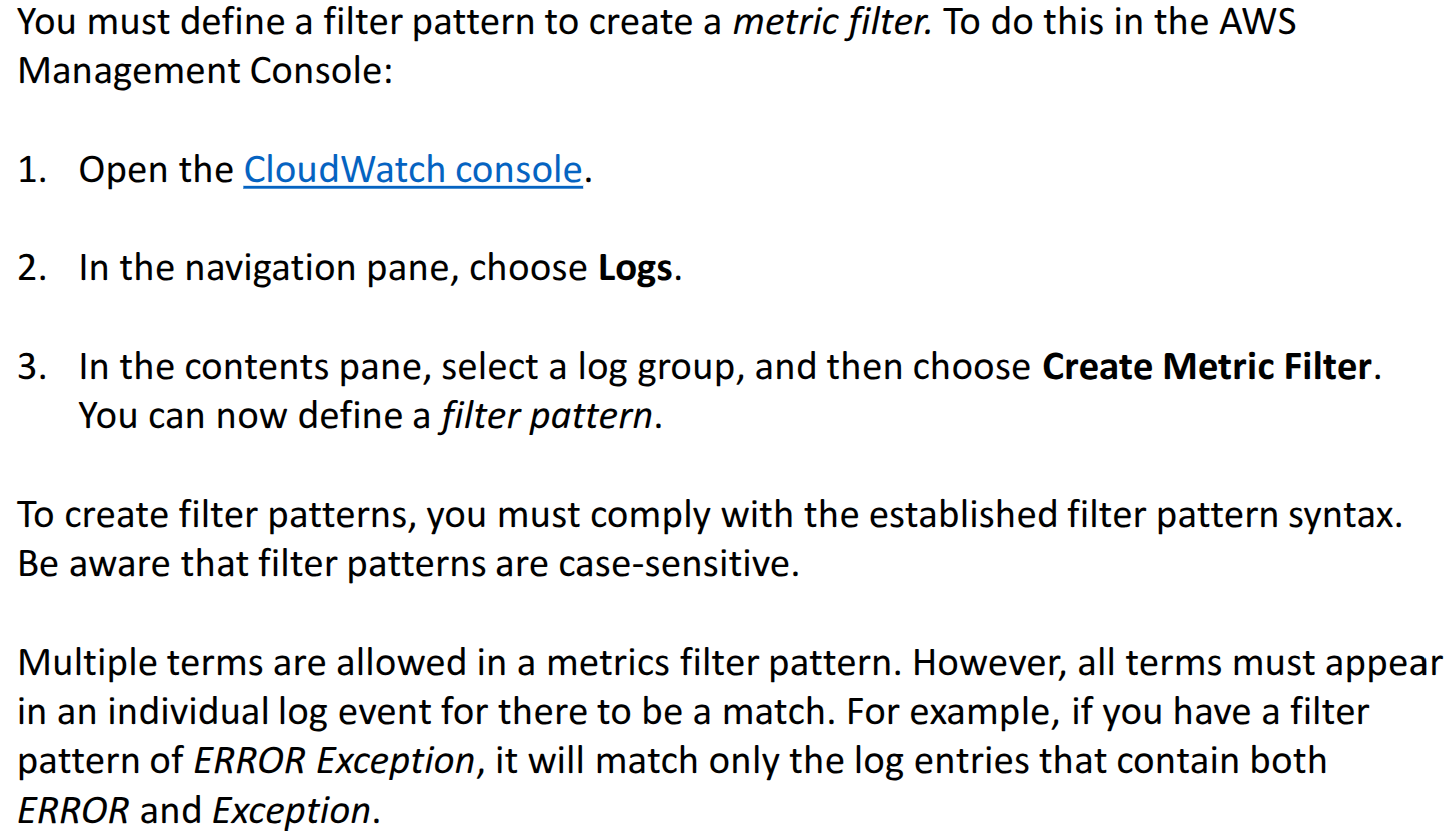

# Lab 186 - Monitoring Infrastructure

## Create a CloudWatch Event

Go to Systems Manager to run a command.

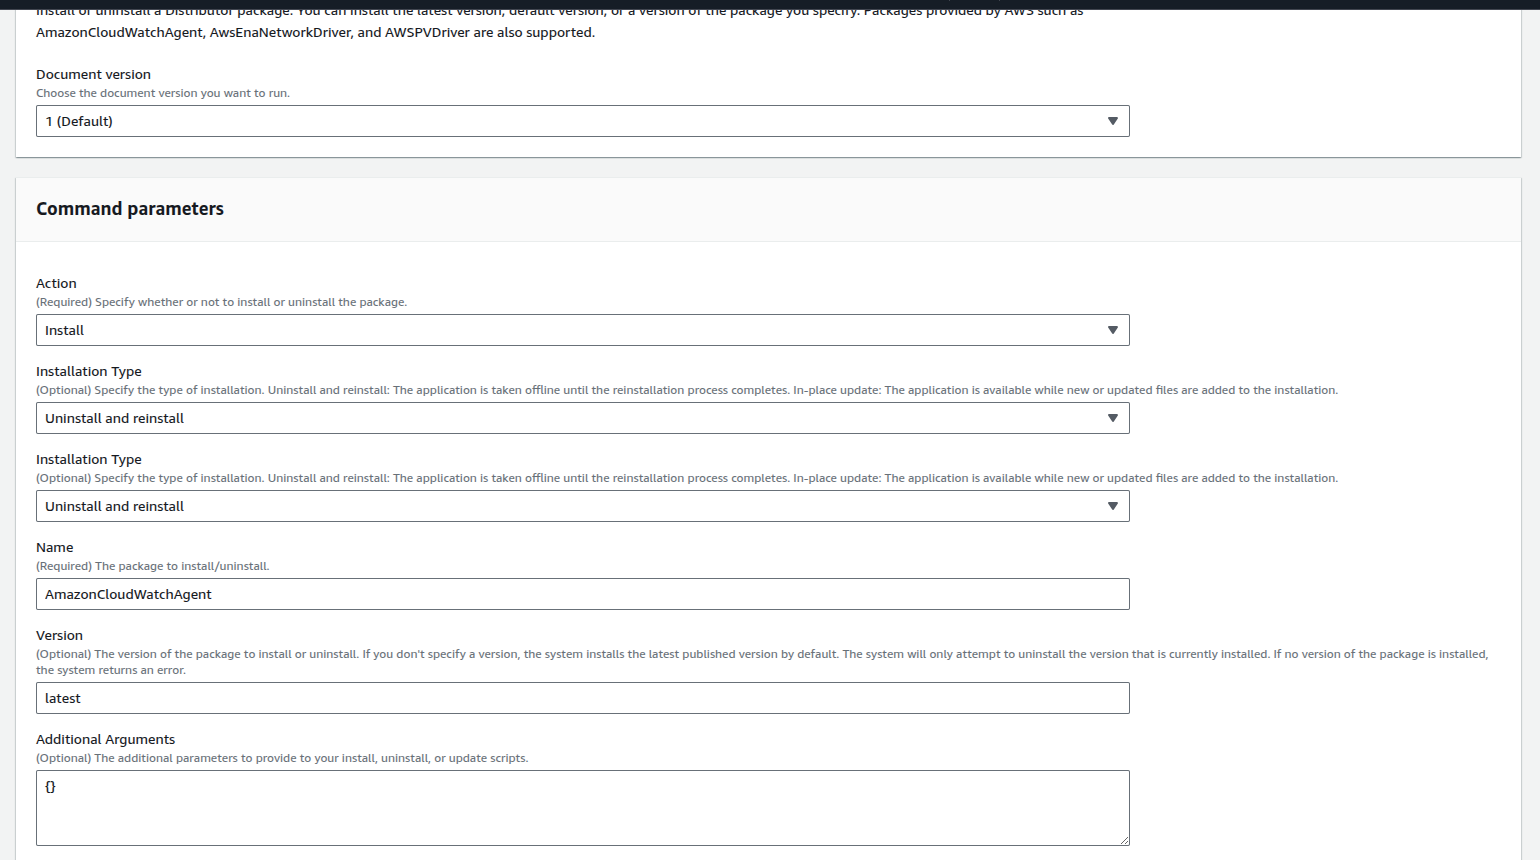

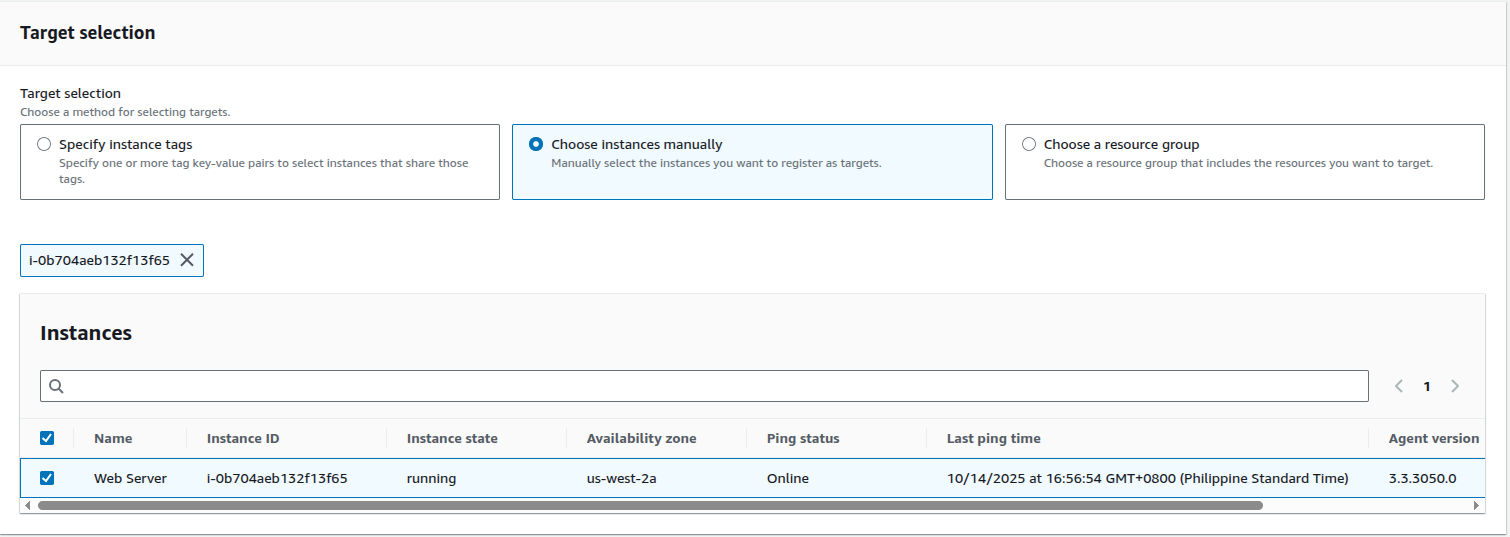

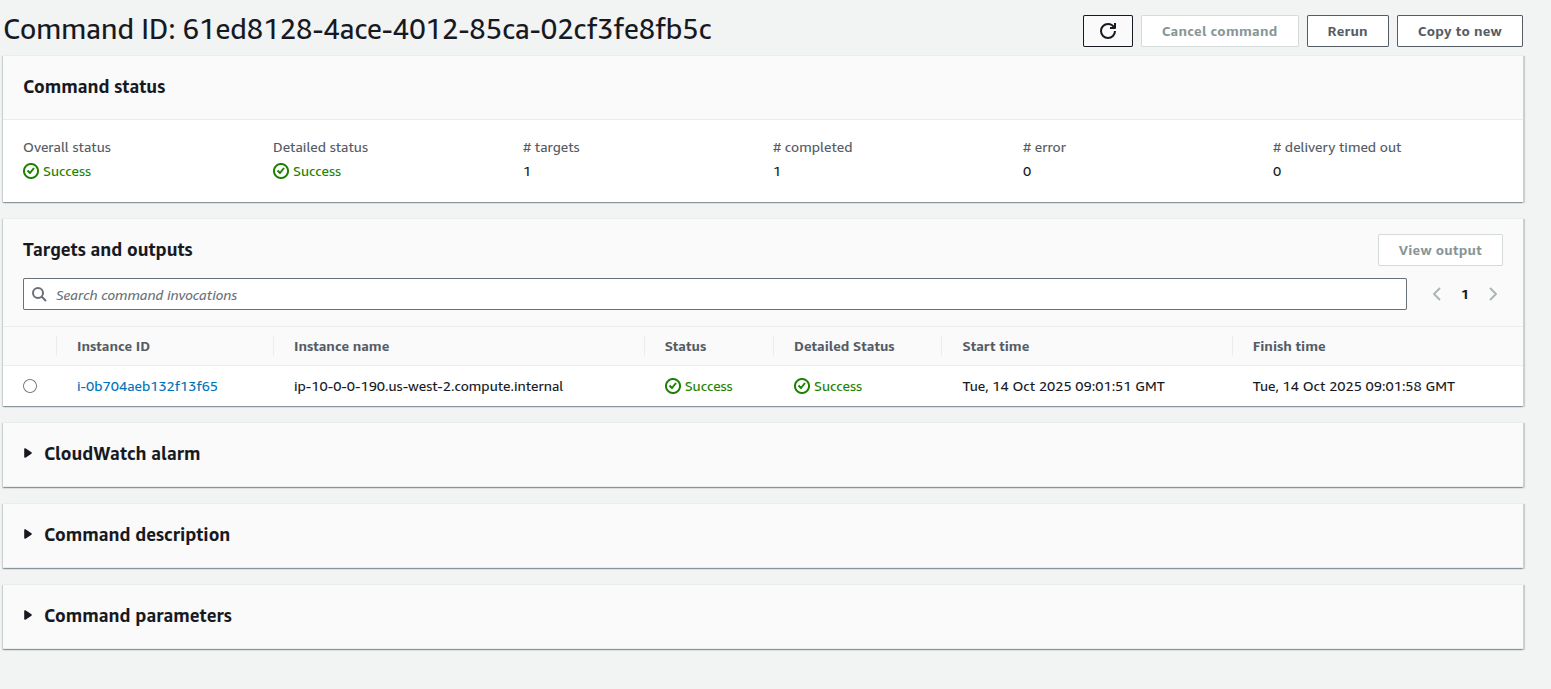

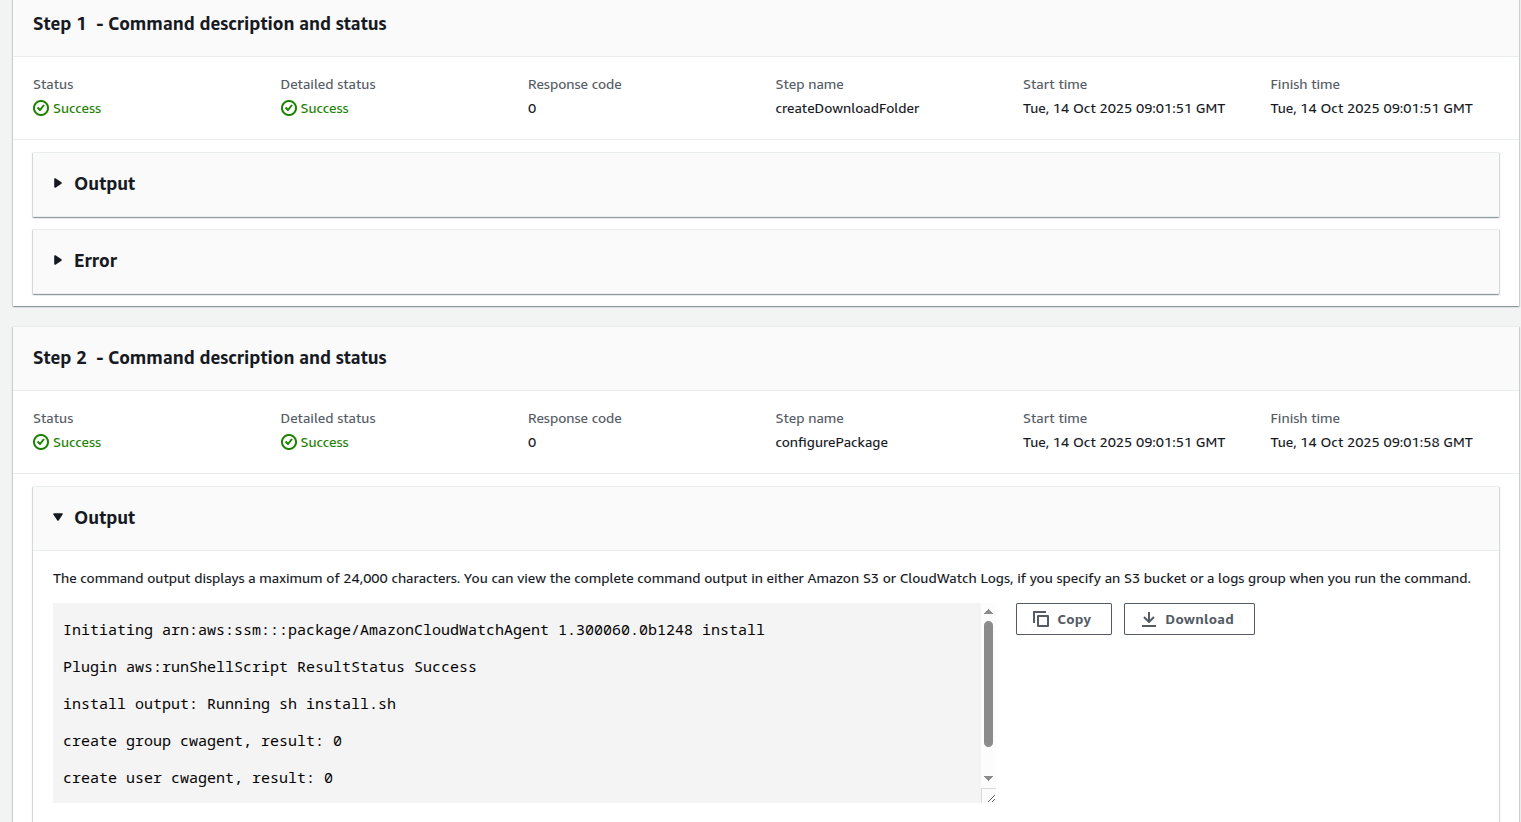

### Create Parameter Store

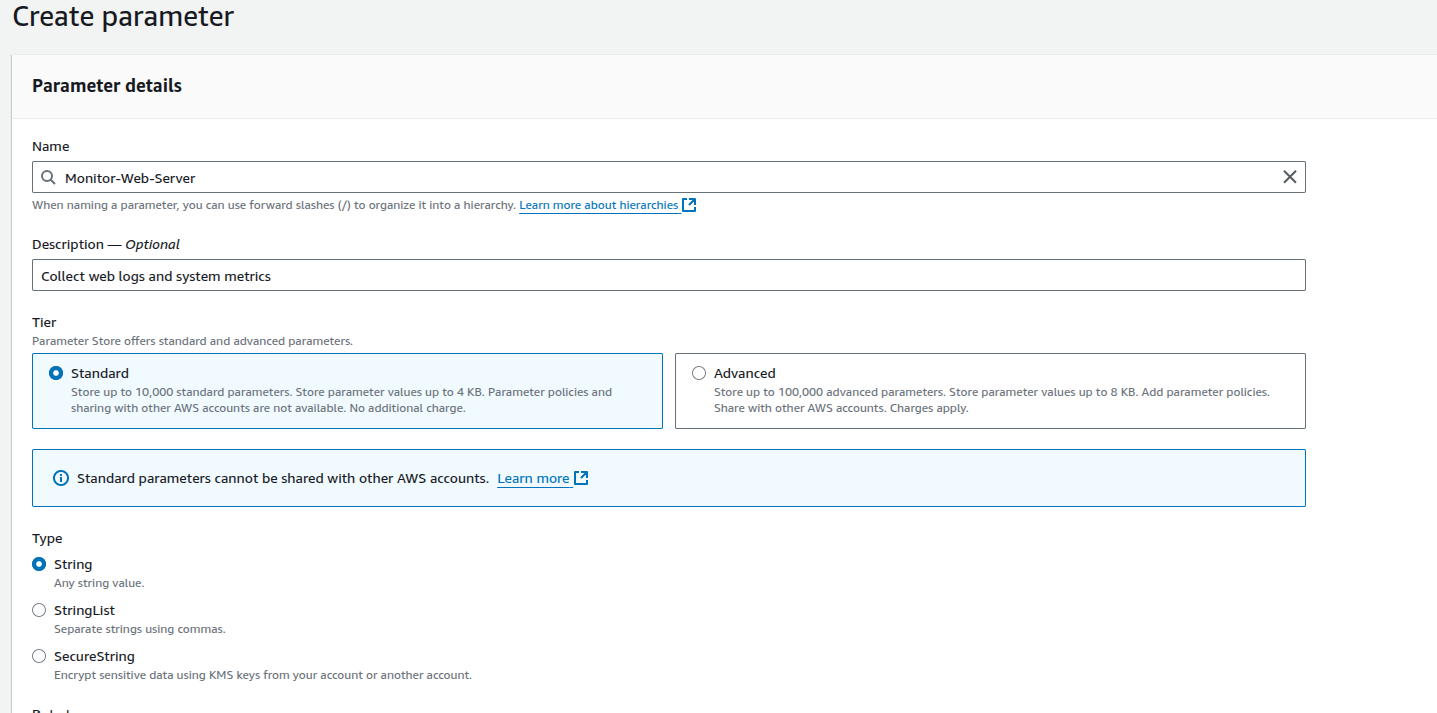

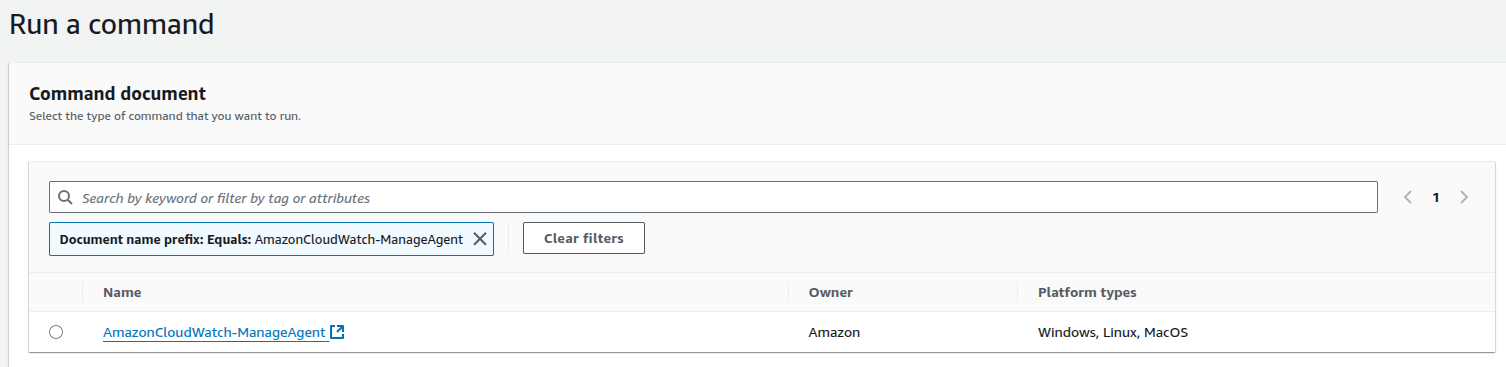

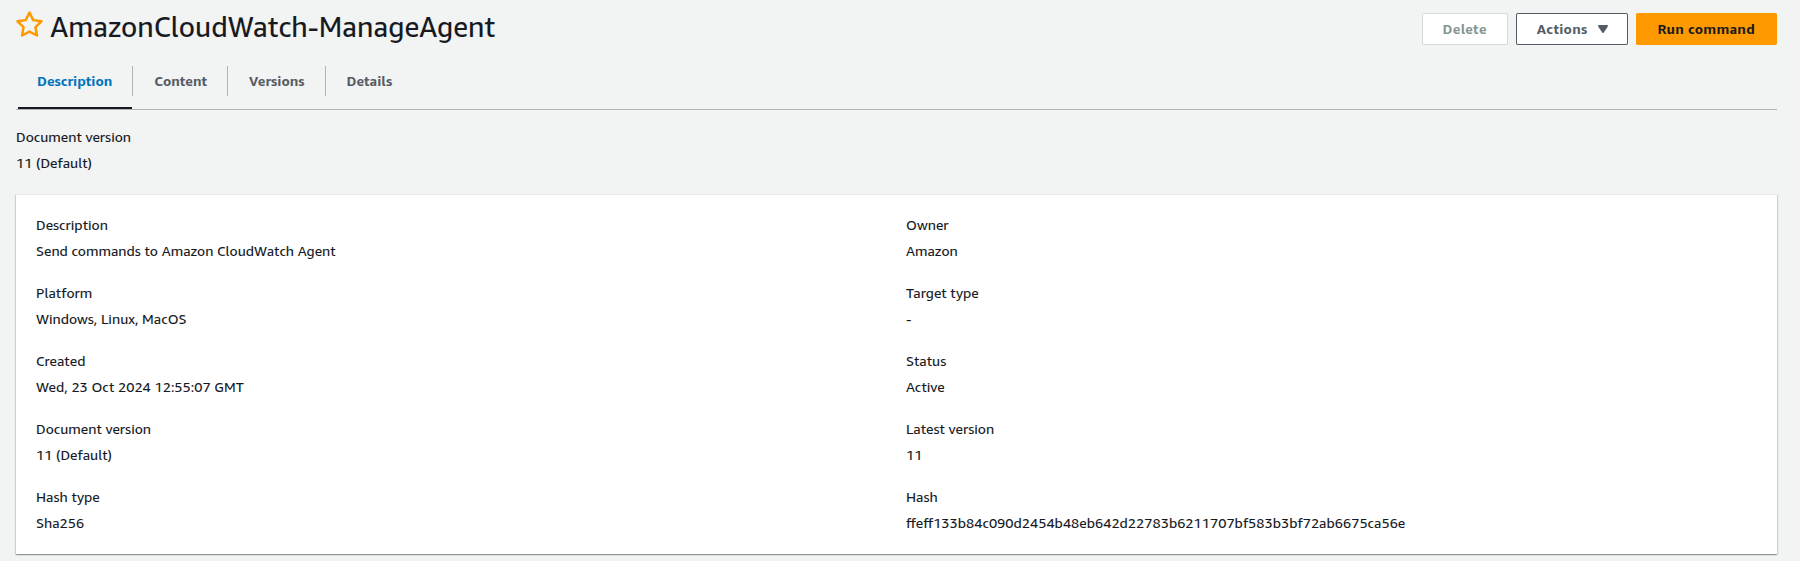

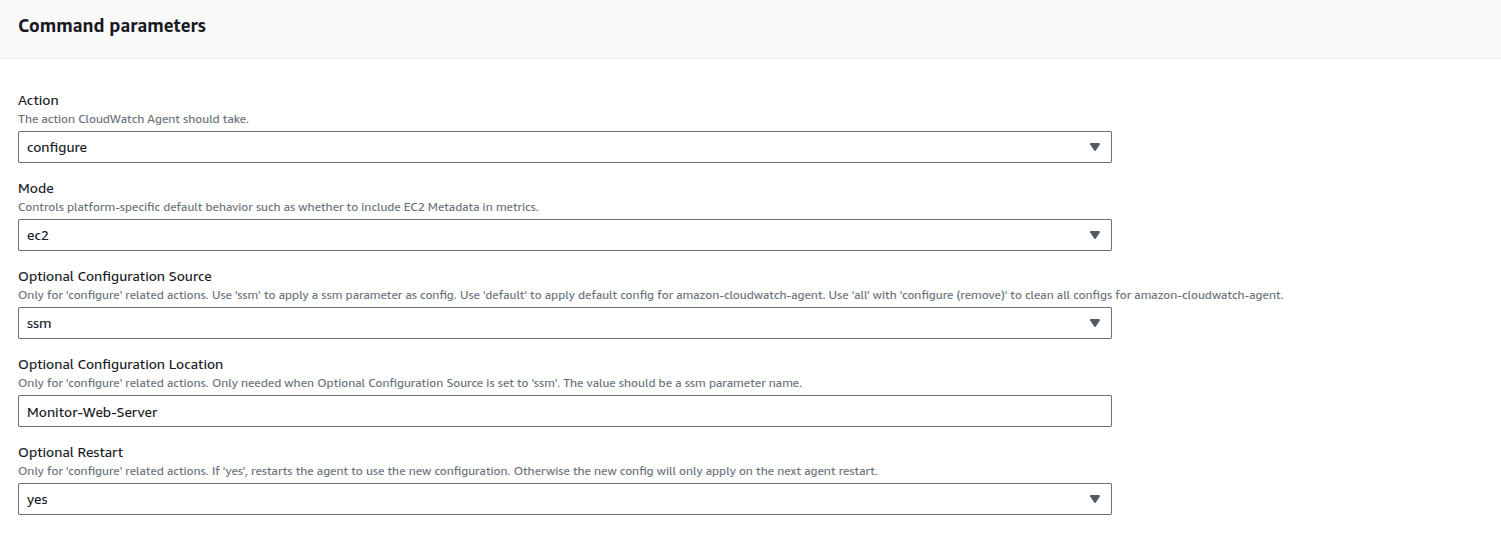

#### Value of Parameter

```{
  "logs": {
    "logs_collected": {
      "files": {
        "collect_list": [
          {
            "log_group_name": "HttpAccessLog",
            "file_path": "/var/log/httpd/access_log",
            "log_stream_name": "{instance_id}",
            "timestamp_format": "%b %d %H:%M:%S"
          },
          {
            "log_group_name": "HttpErrorLog",
            "file_path": "/var/log/httpd/error_log",
            "log_stream_name": "{instance_id}",
            "timestamp_format": "%b %d %H:%M:%S"
          }
        ]
      }
    }
  },
  "metrics": {
    "metrics_collected": {
      "cpu": {
        "measurement": [
          "cpu_usage_idle",
          "cpu_usage_iowait",
          "cpu_usage_user",
          "cpu_usage_system"
        ],
        "metrics_collection_interval": 10,
        "totalcpu": false
      },
      "disk": {
        "measurement": [
          "used_percent",
          "inodes_free"
        ],
        "metrics_collection_interval": 10,
        "resources": [
          "*"
        ]
      },
      "diskio": {
        "measurement": [
          "io_time"
        ],
        "metrics_collection_interval": 10,
        "resources": [
          "*"
        ]
      },
      "mem": {
        "measurement": [
          "mem_used_percent"
        ],
        "metrics_collection_interval": 10
      },
      "swap": {
        "measurement": [
          "swap_used_percent"
        ],
        "metrics_collection_interval": 10
      }
    }
  }
}```

## Monitoring application logs using CloudWatch Logs

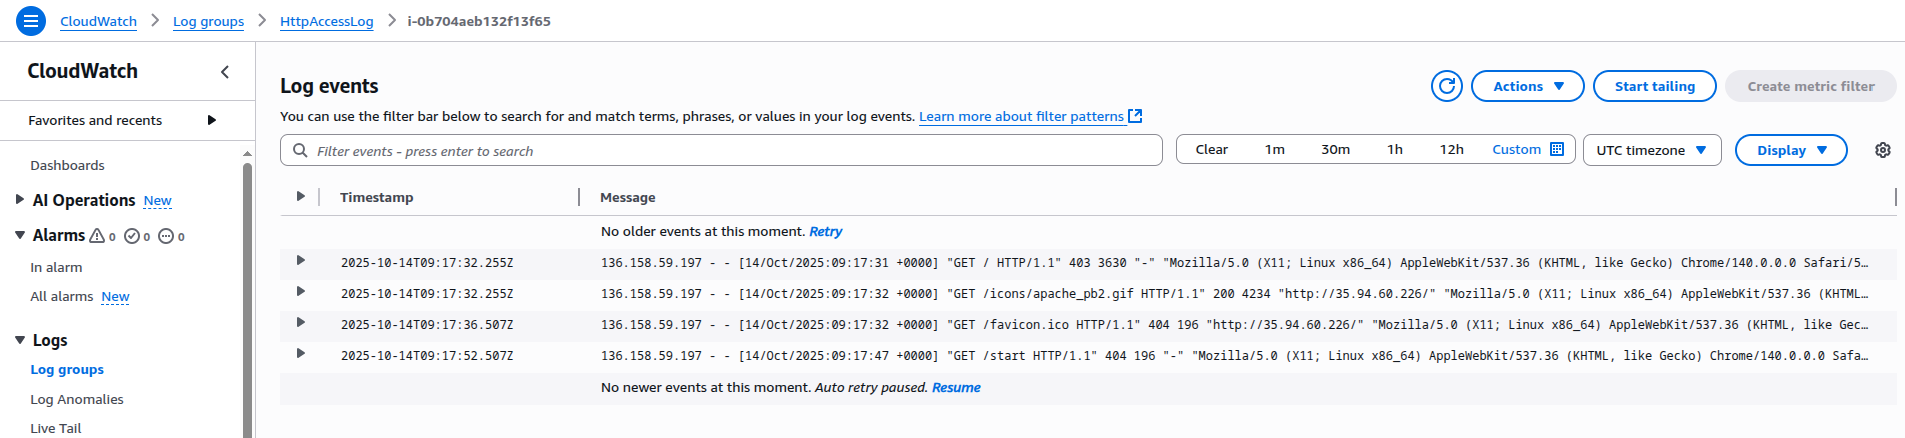

### Create a metric filter in CloudWatch Logs

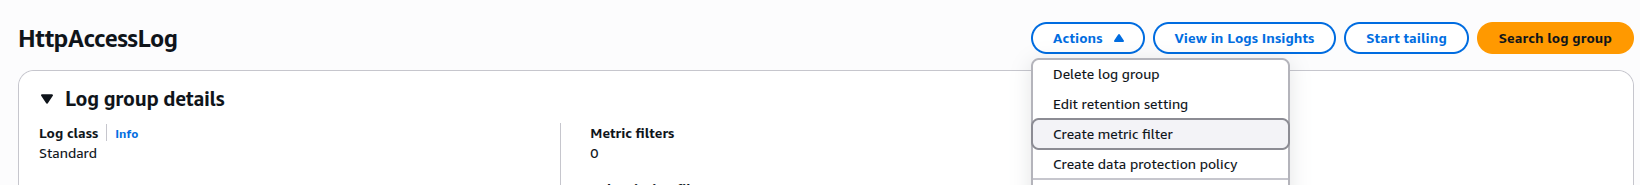

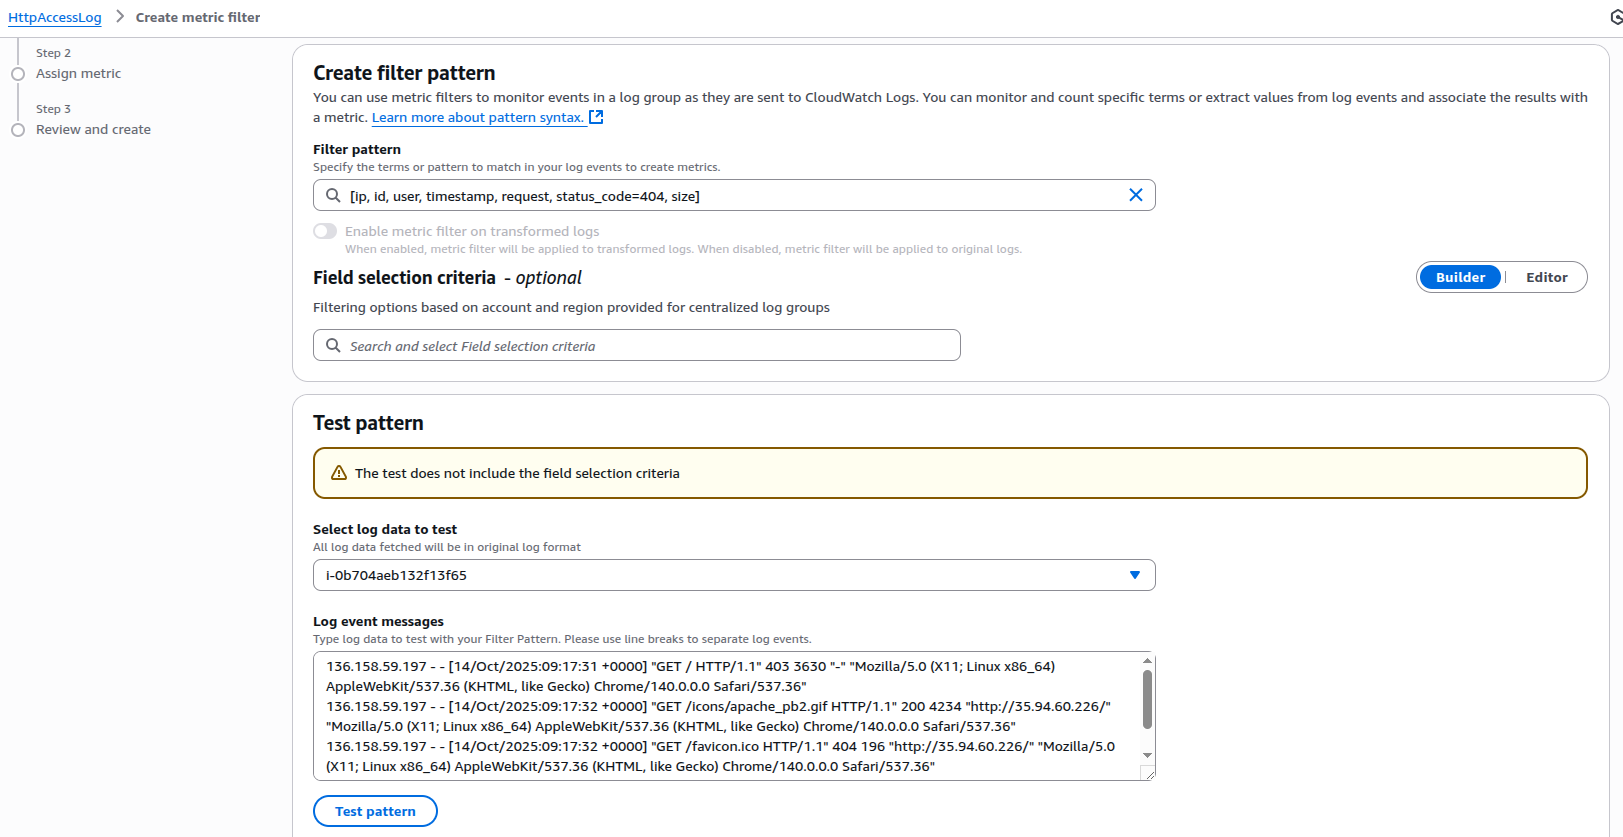

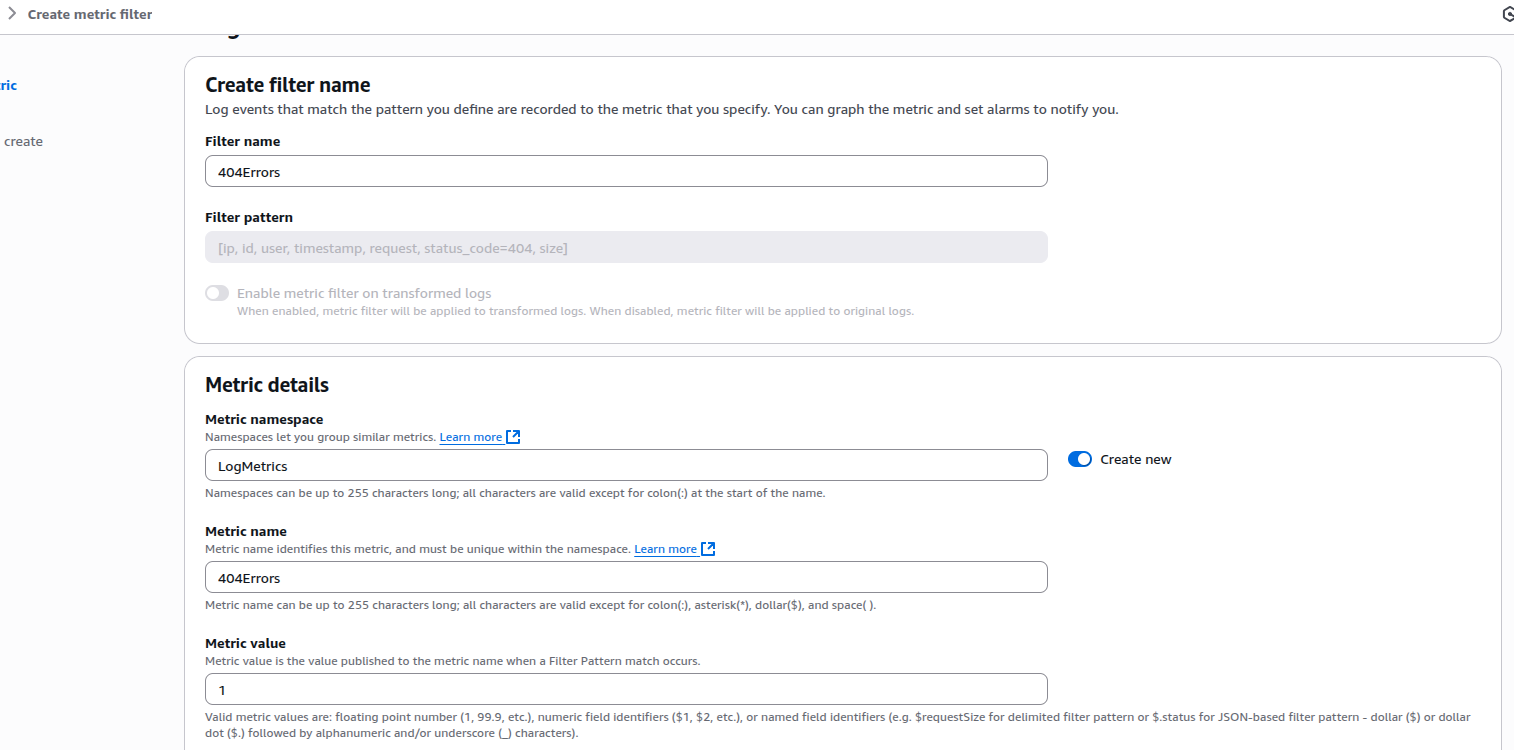

### Create an Alarm Using the Filter

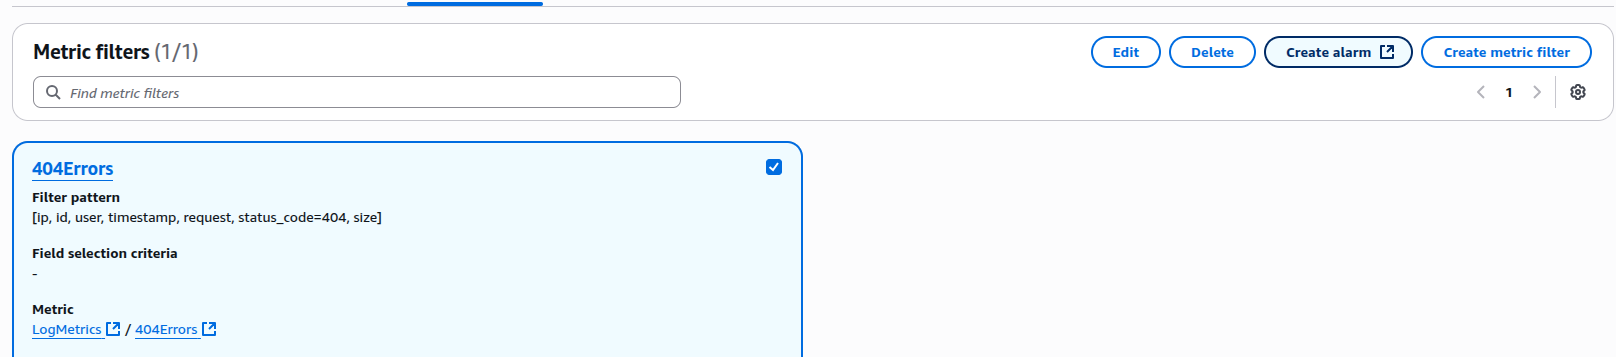

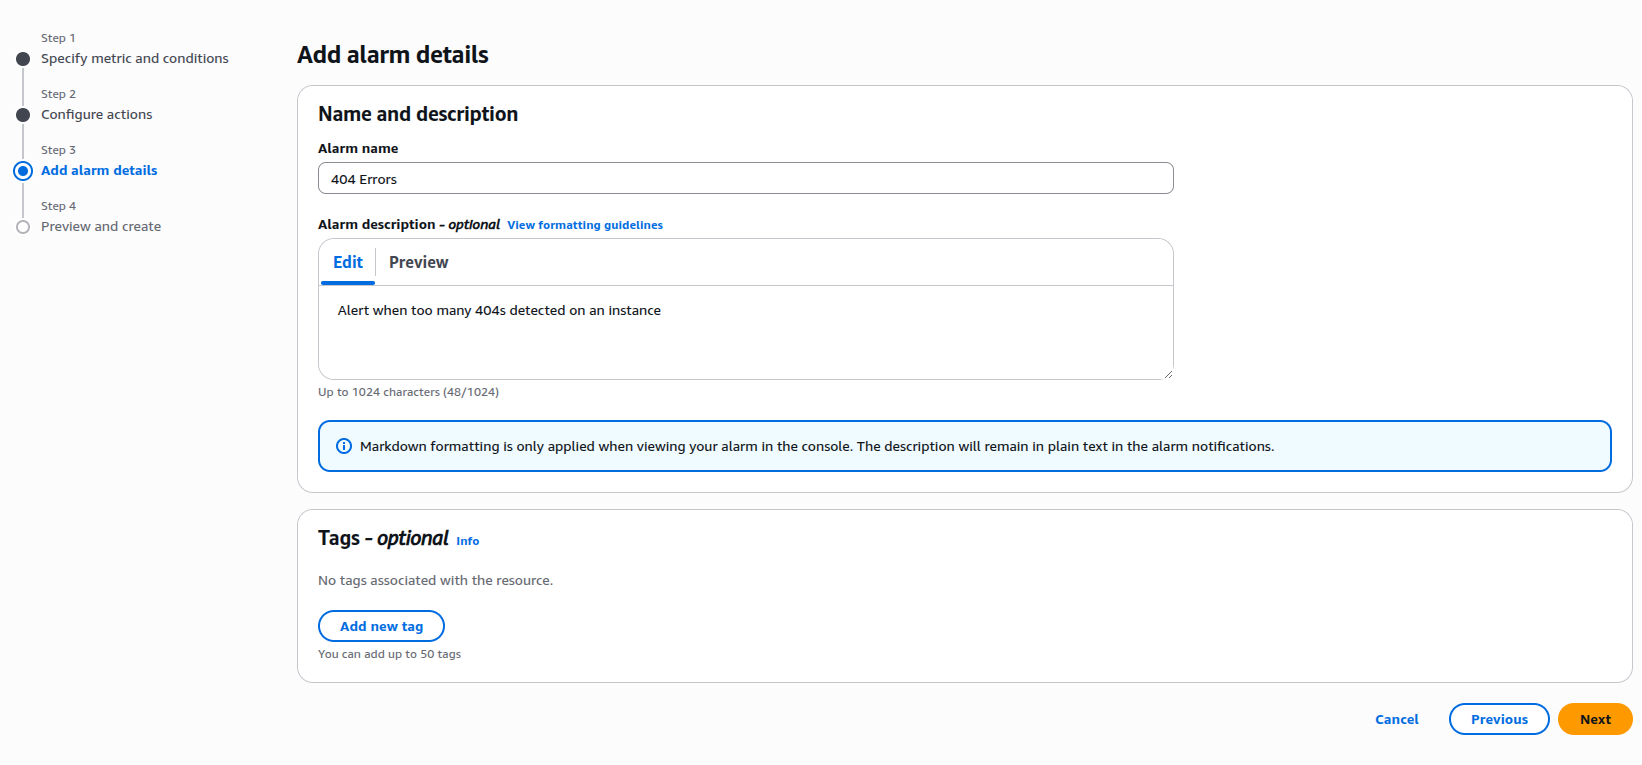

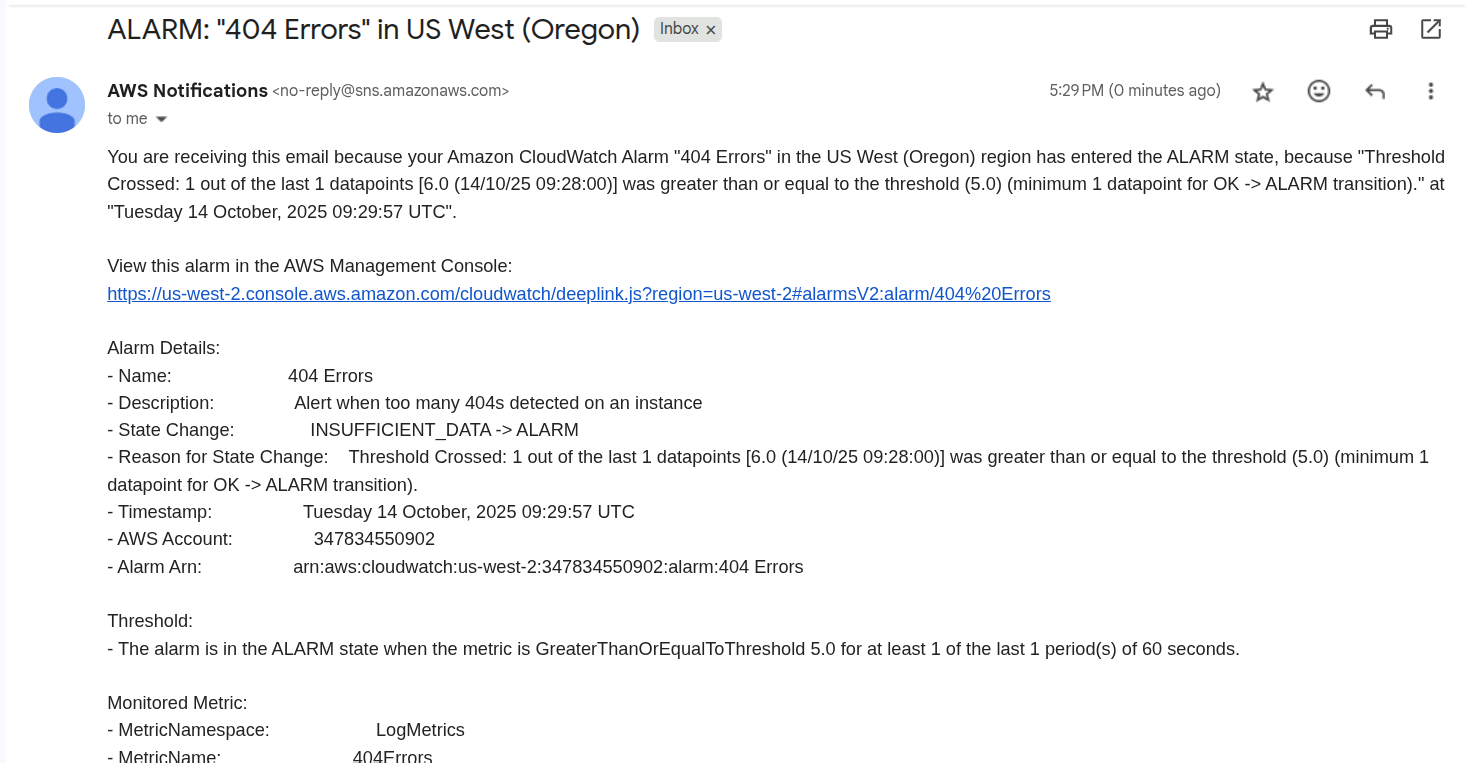

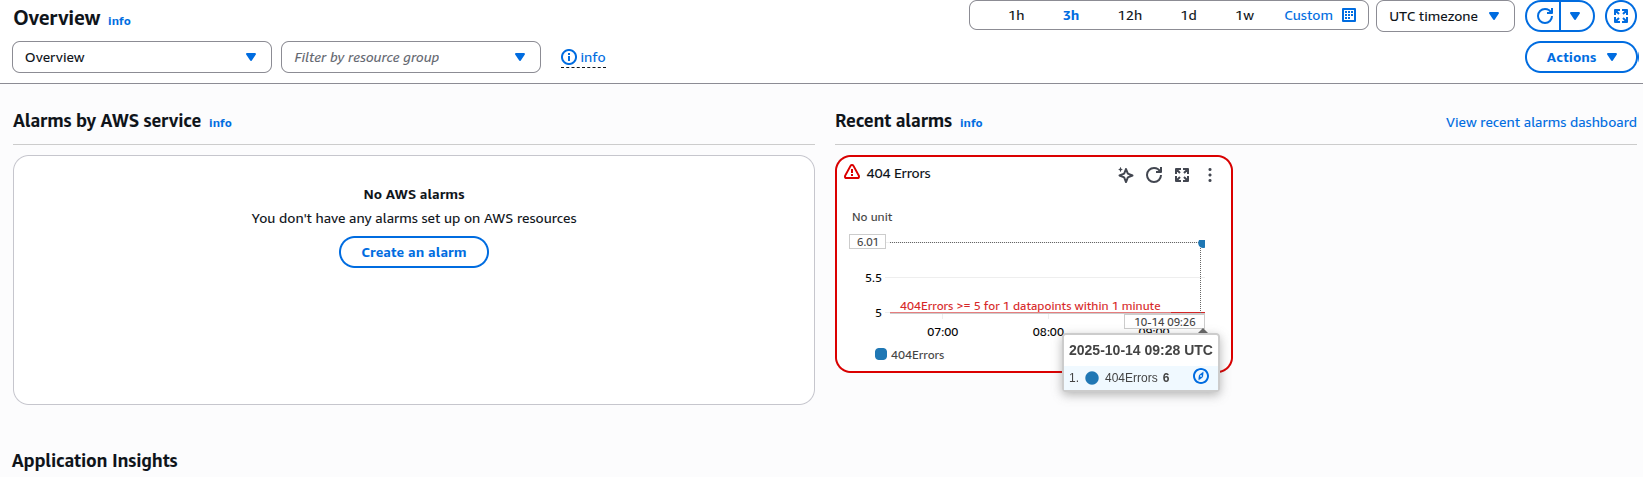

## Monitoring instance metrics using CloudWatch

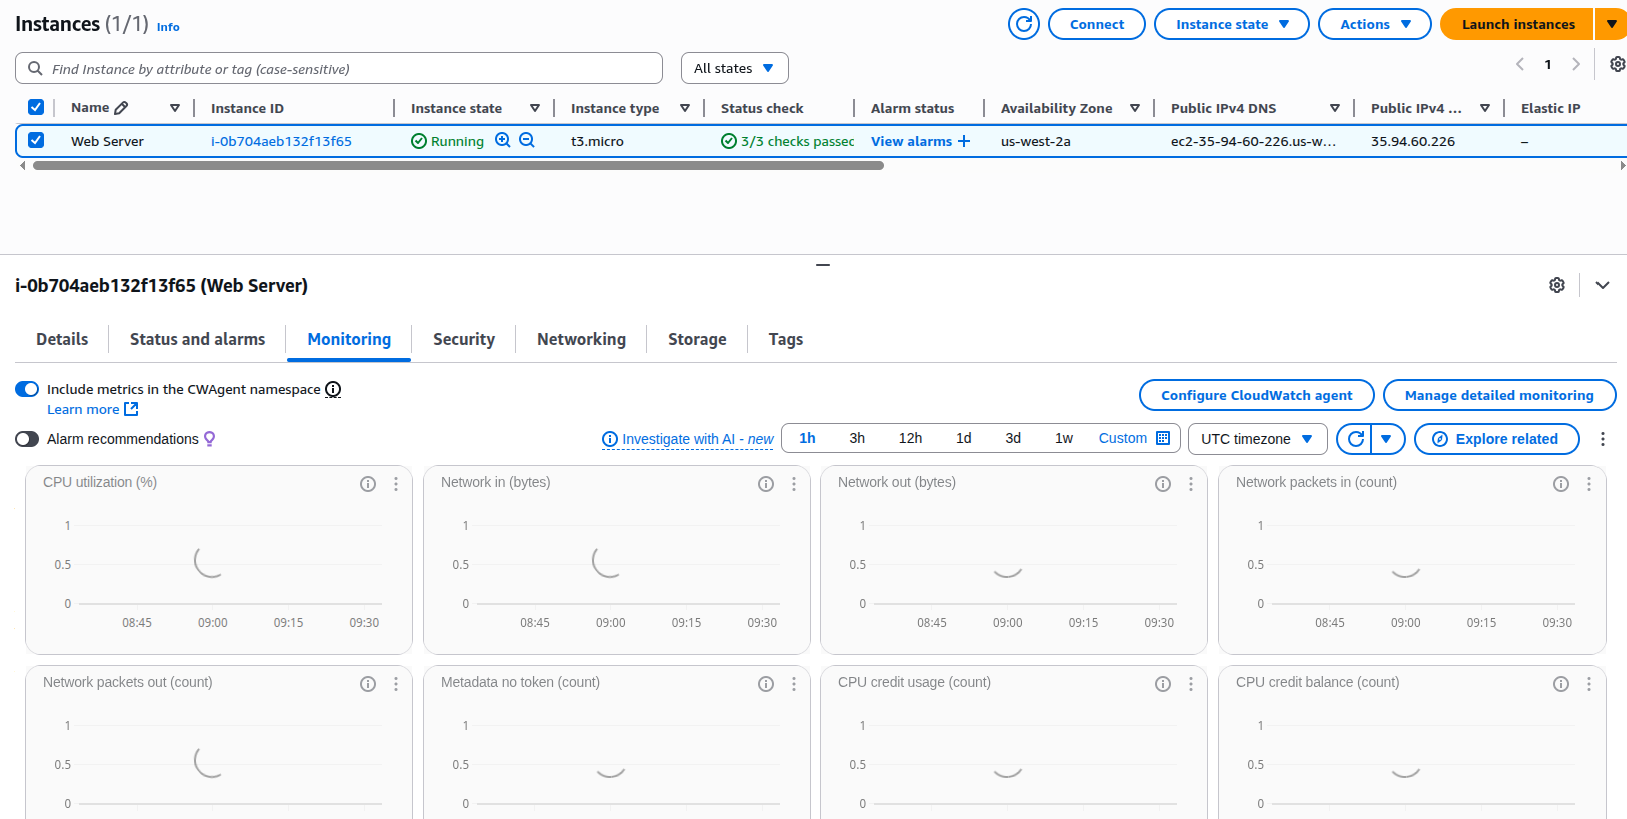

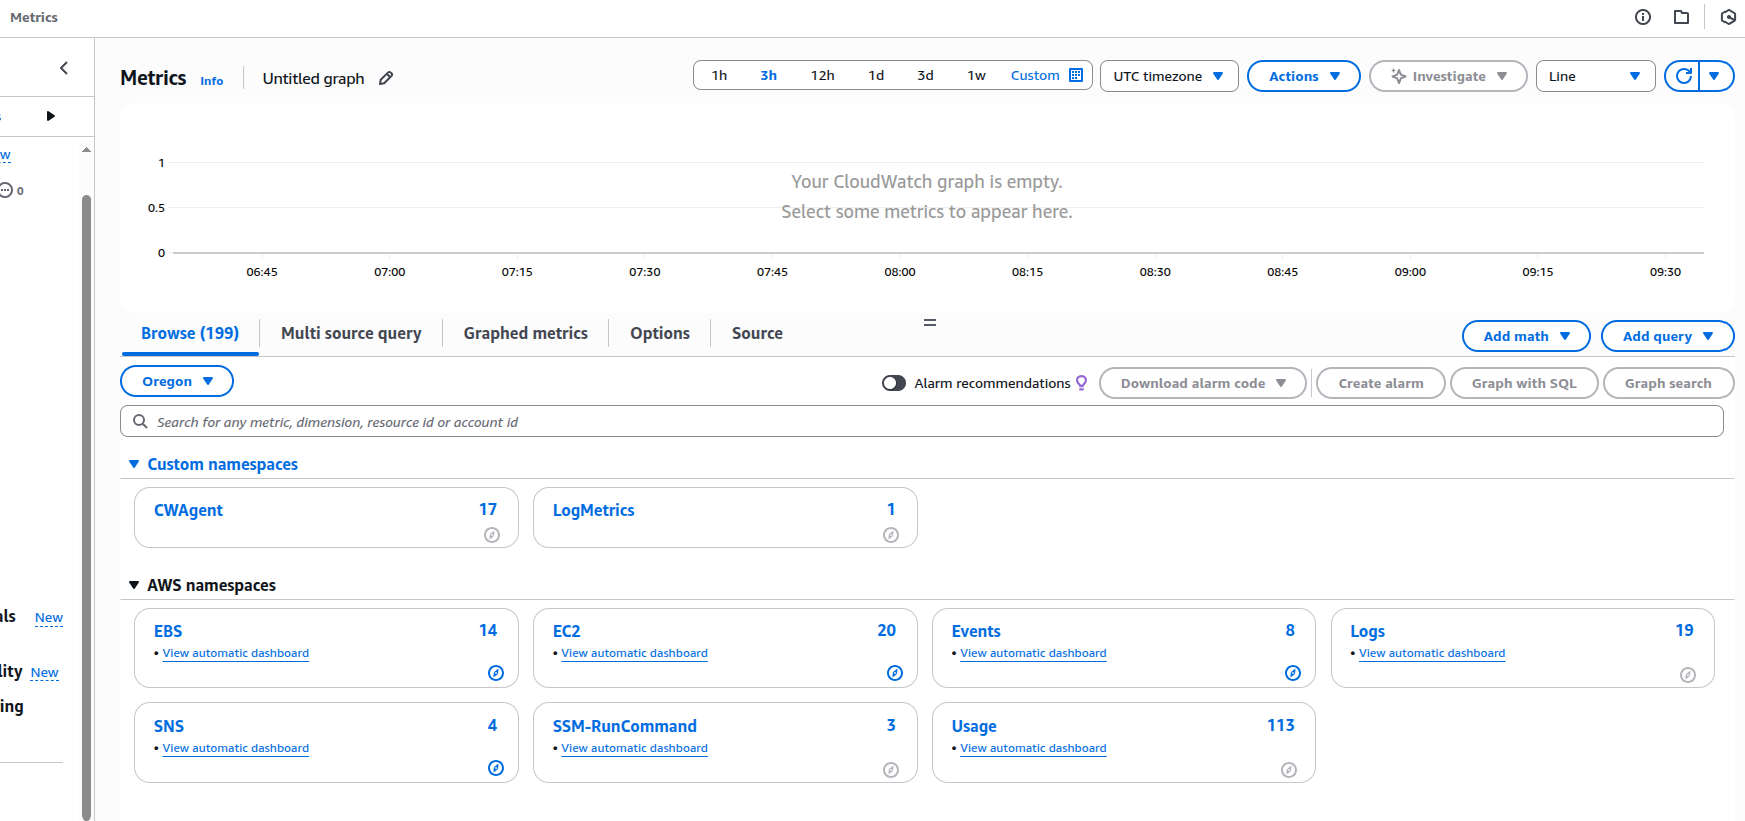

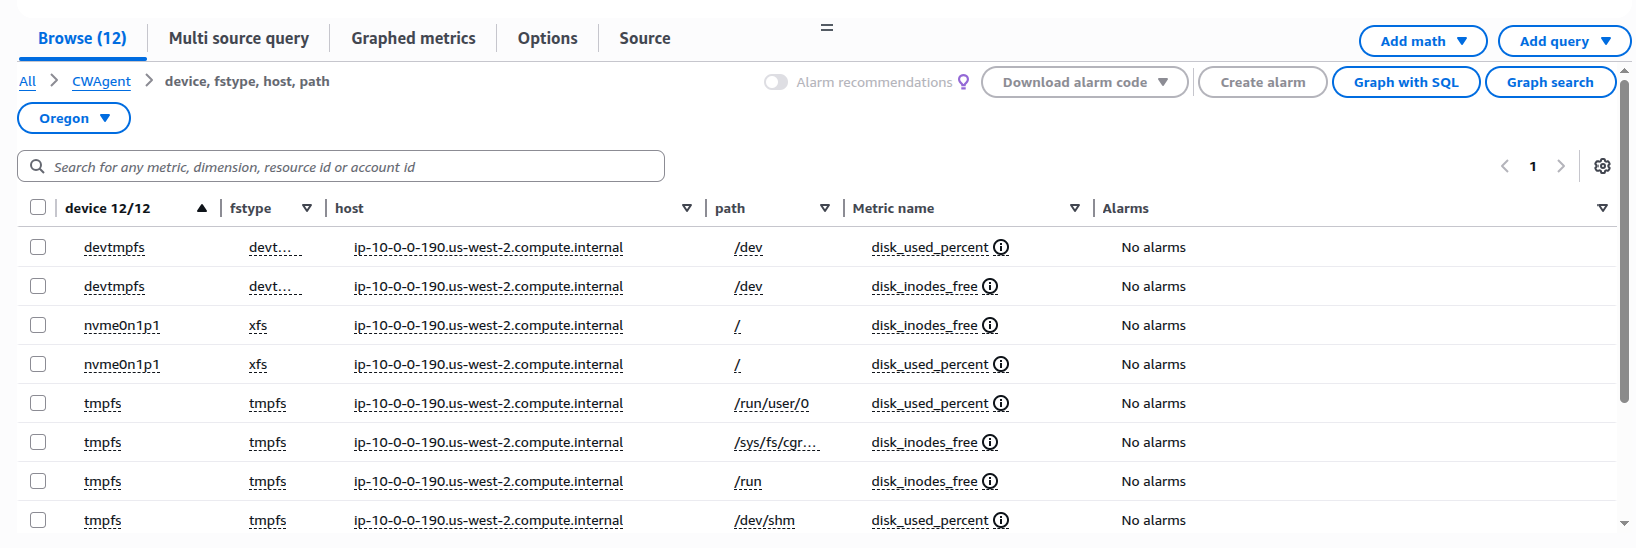

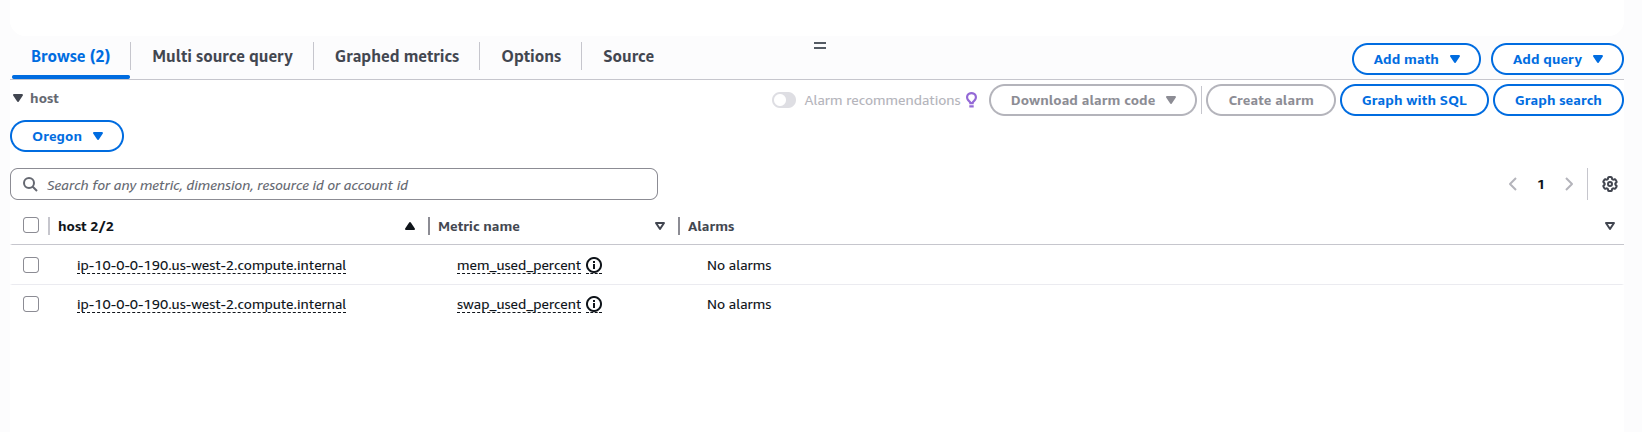

## Creating real time notifications

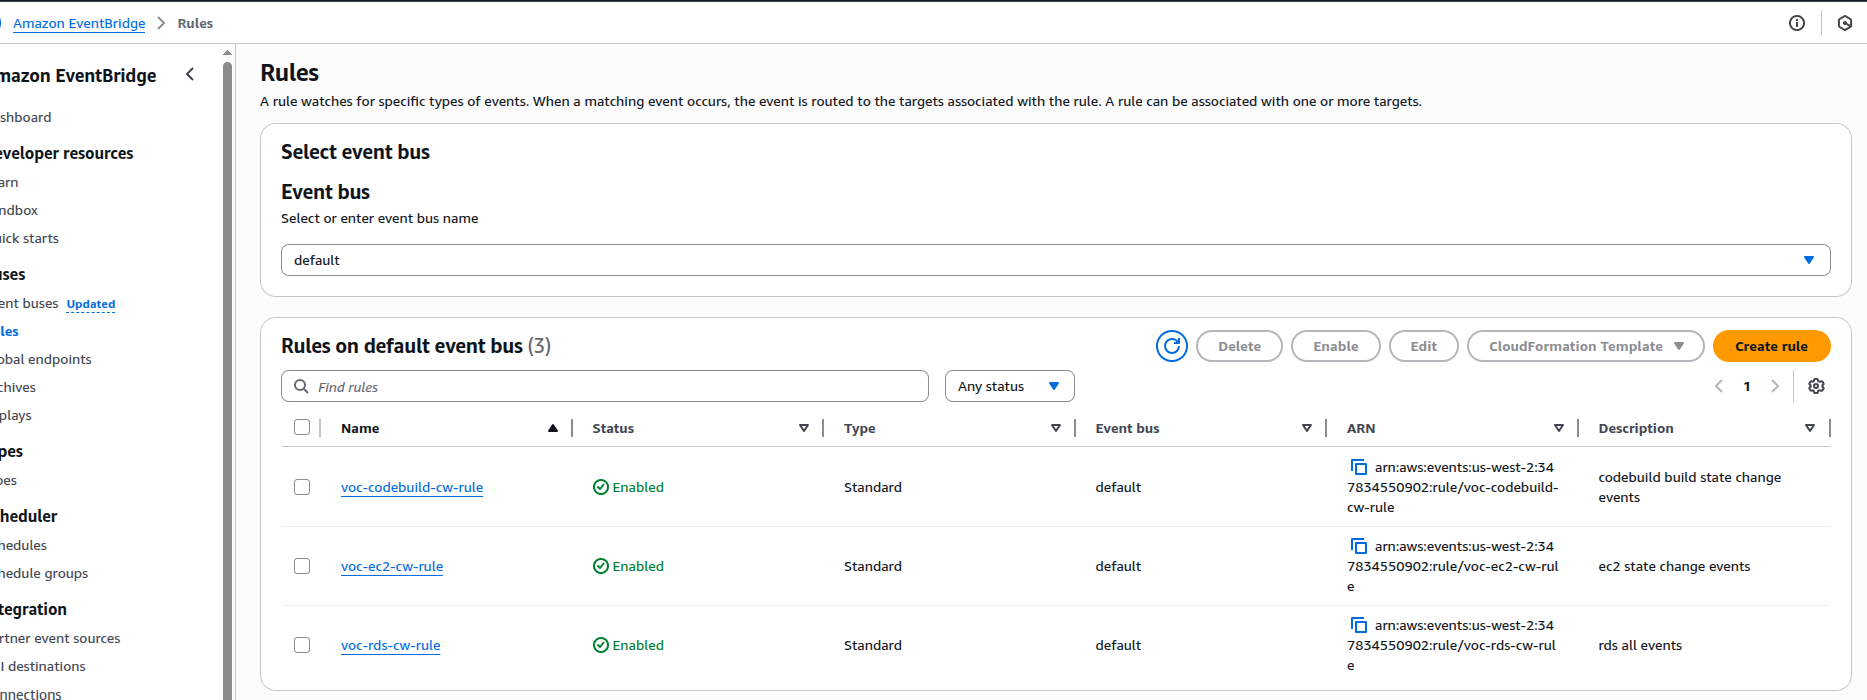

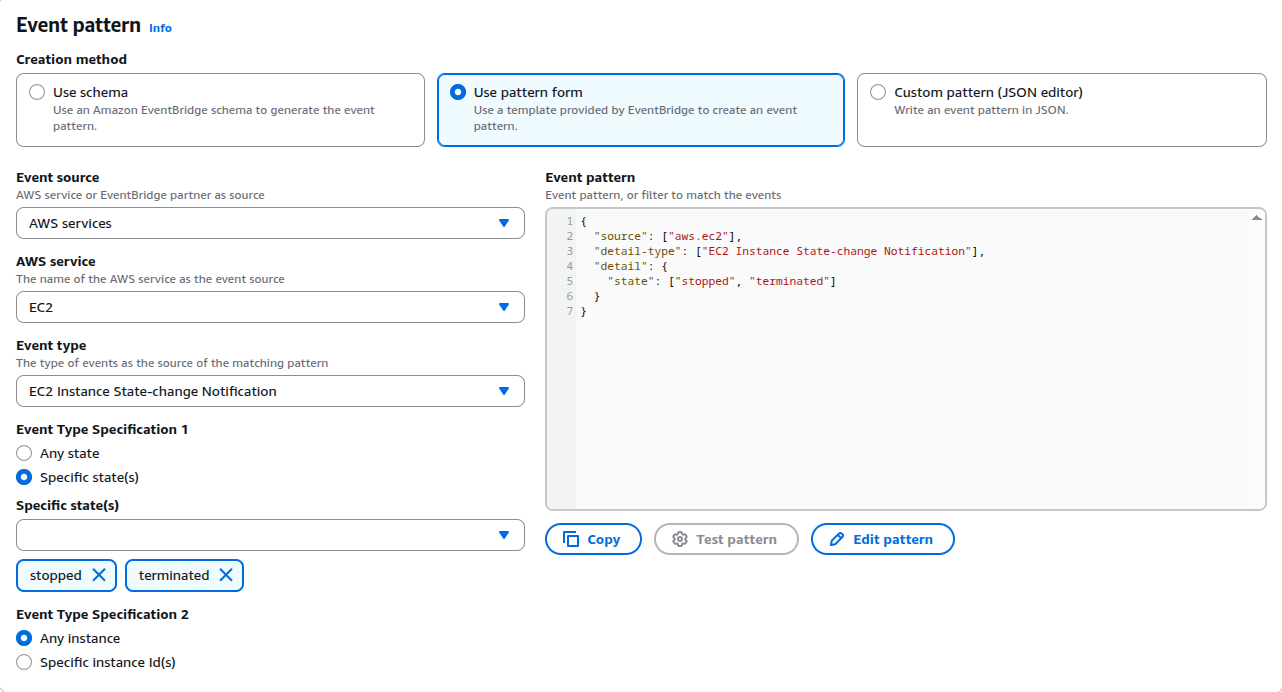

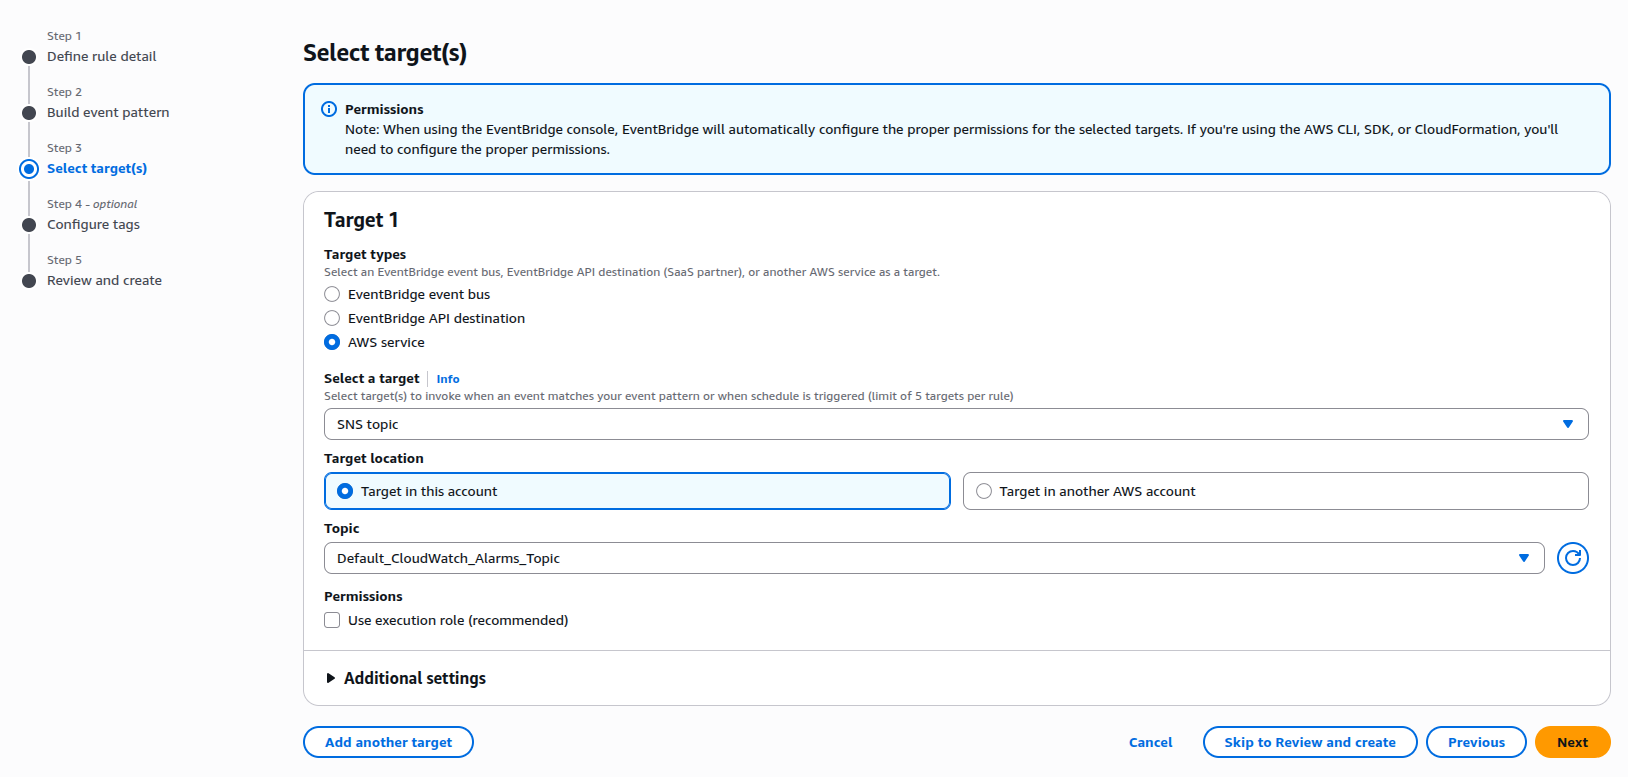

### Configuring a Real-Time Notification

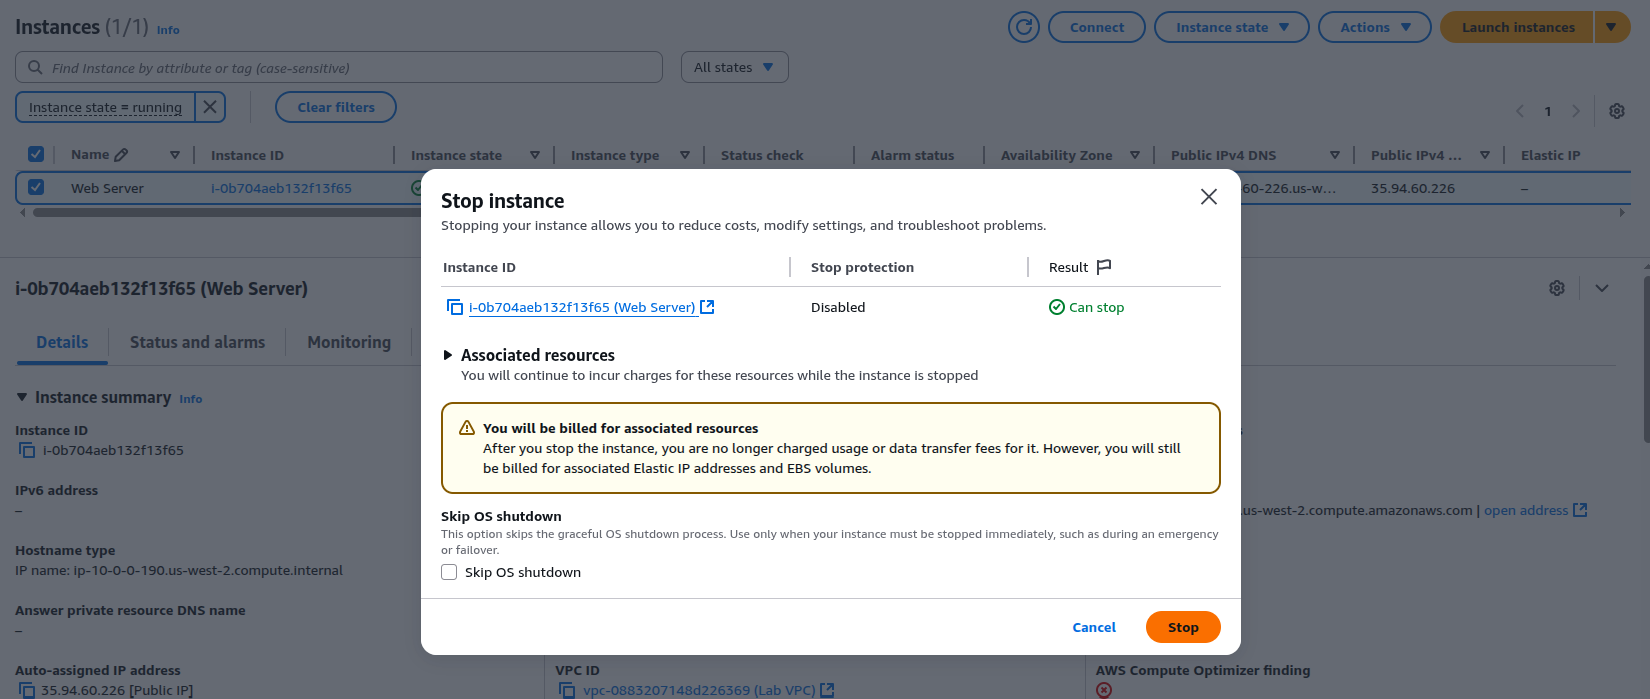

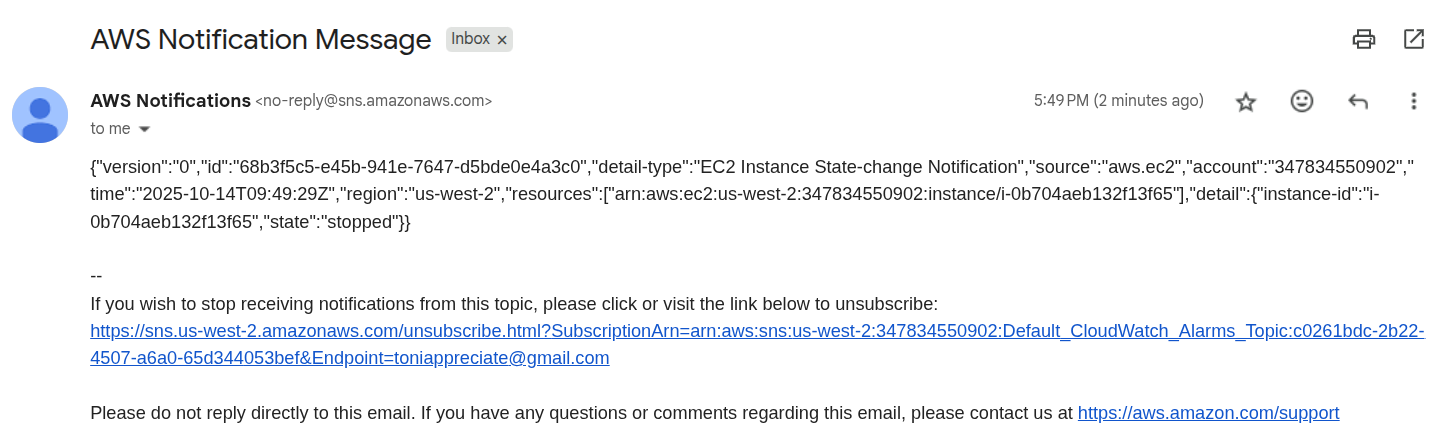

## Monitoring for infrastructure compliance

Using **AWS Config**

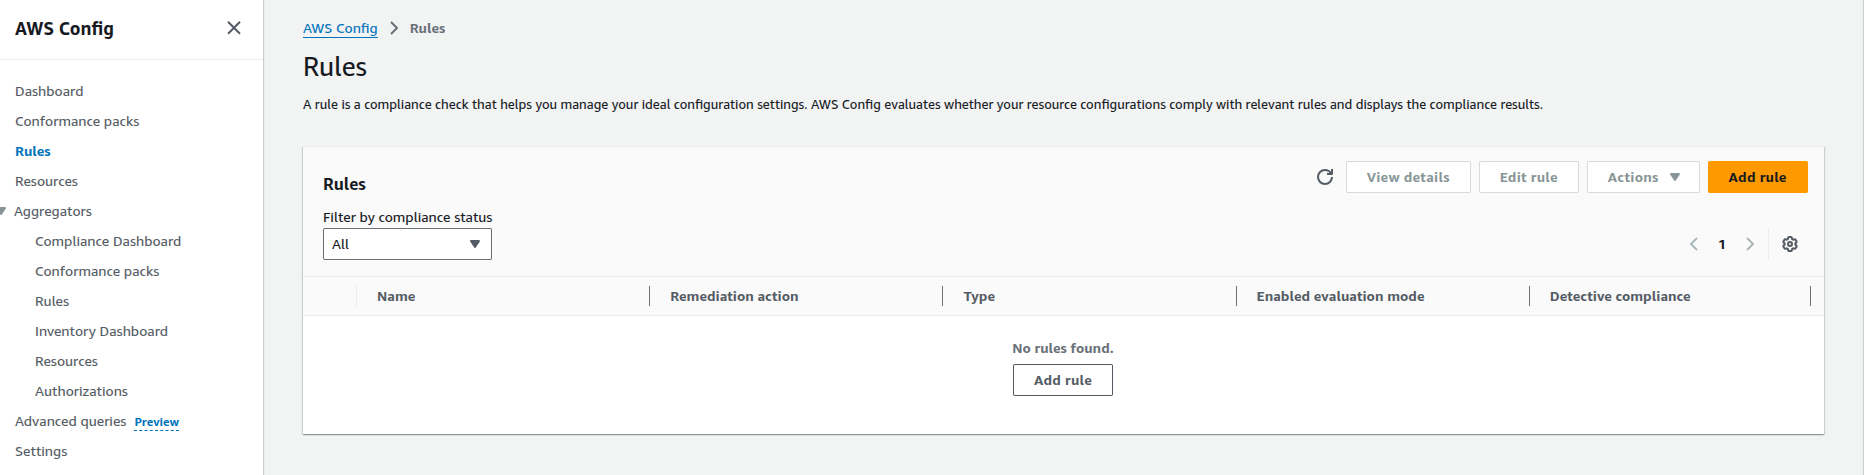

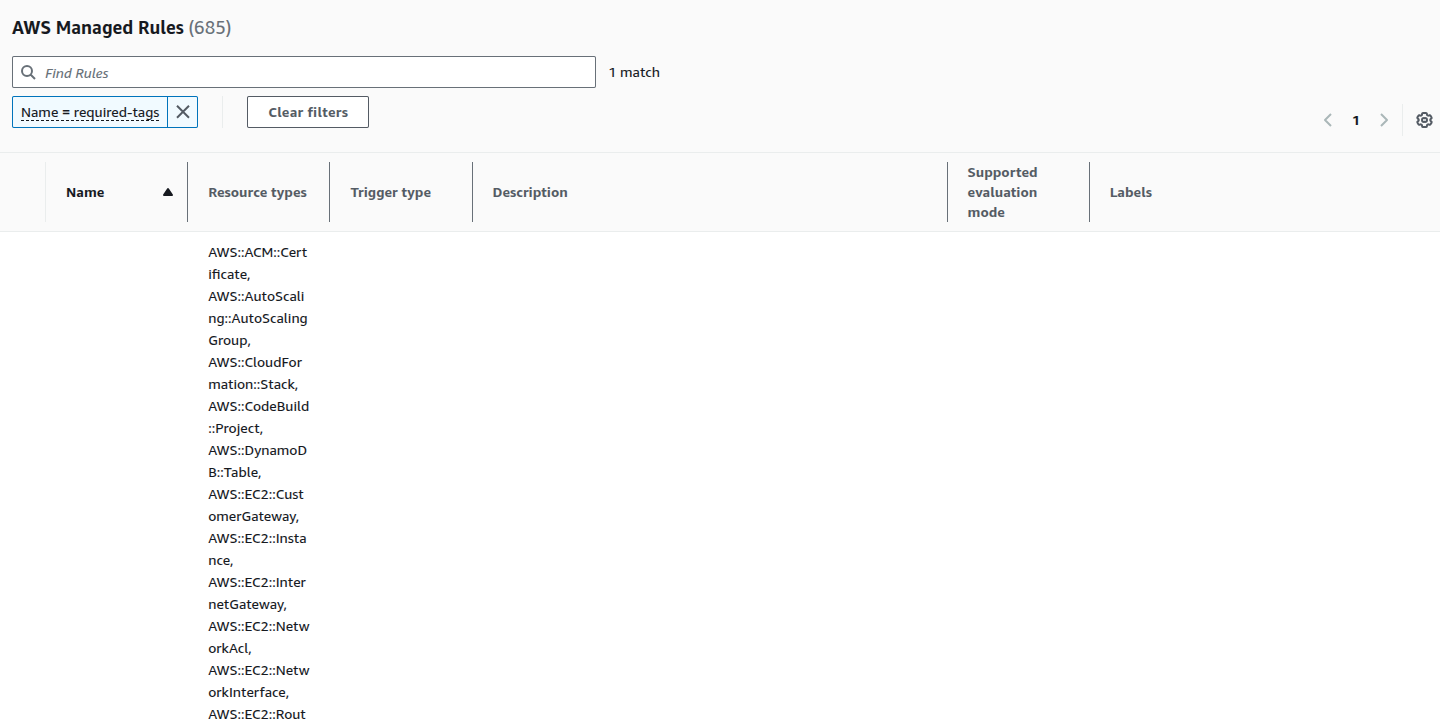

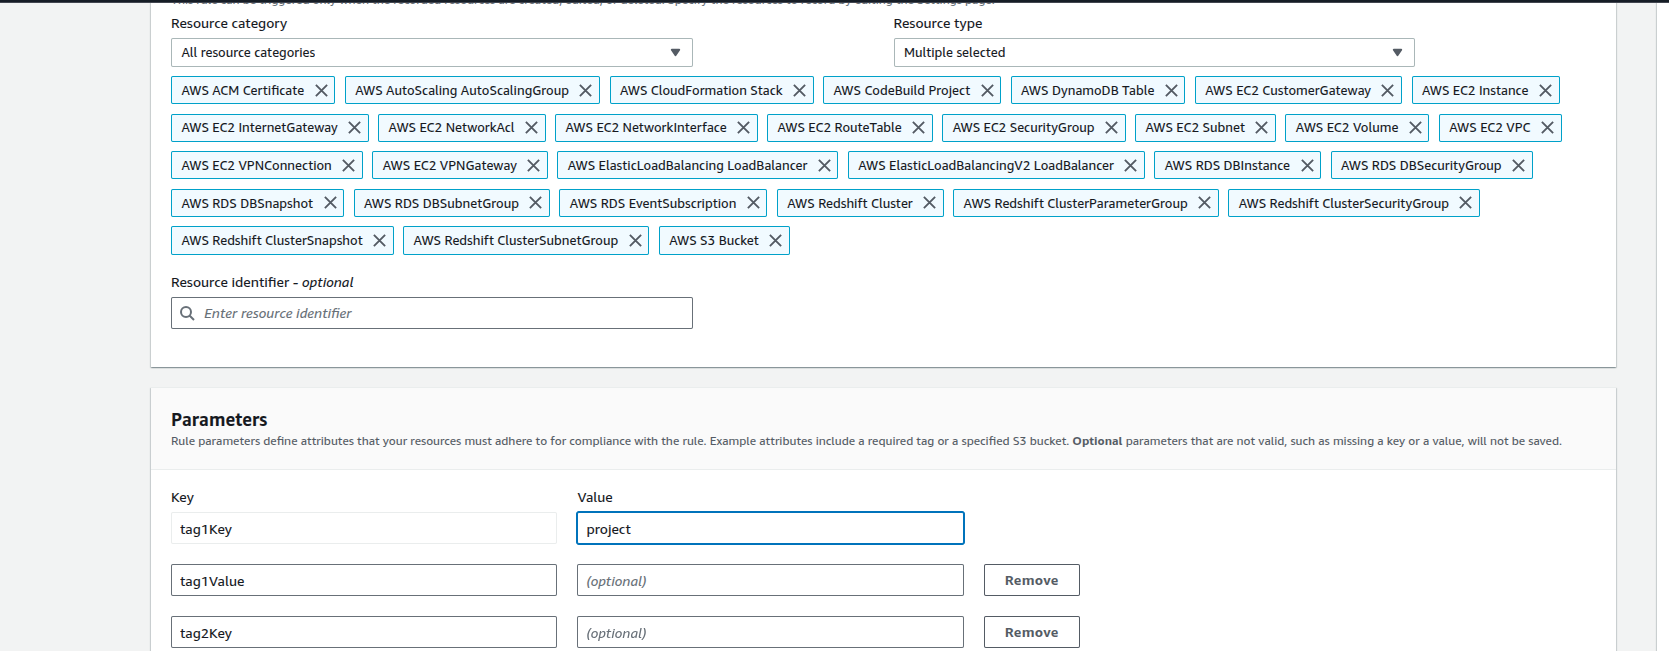

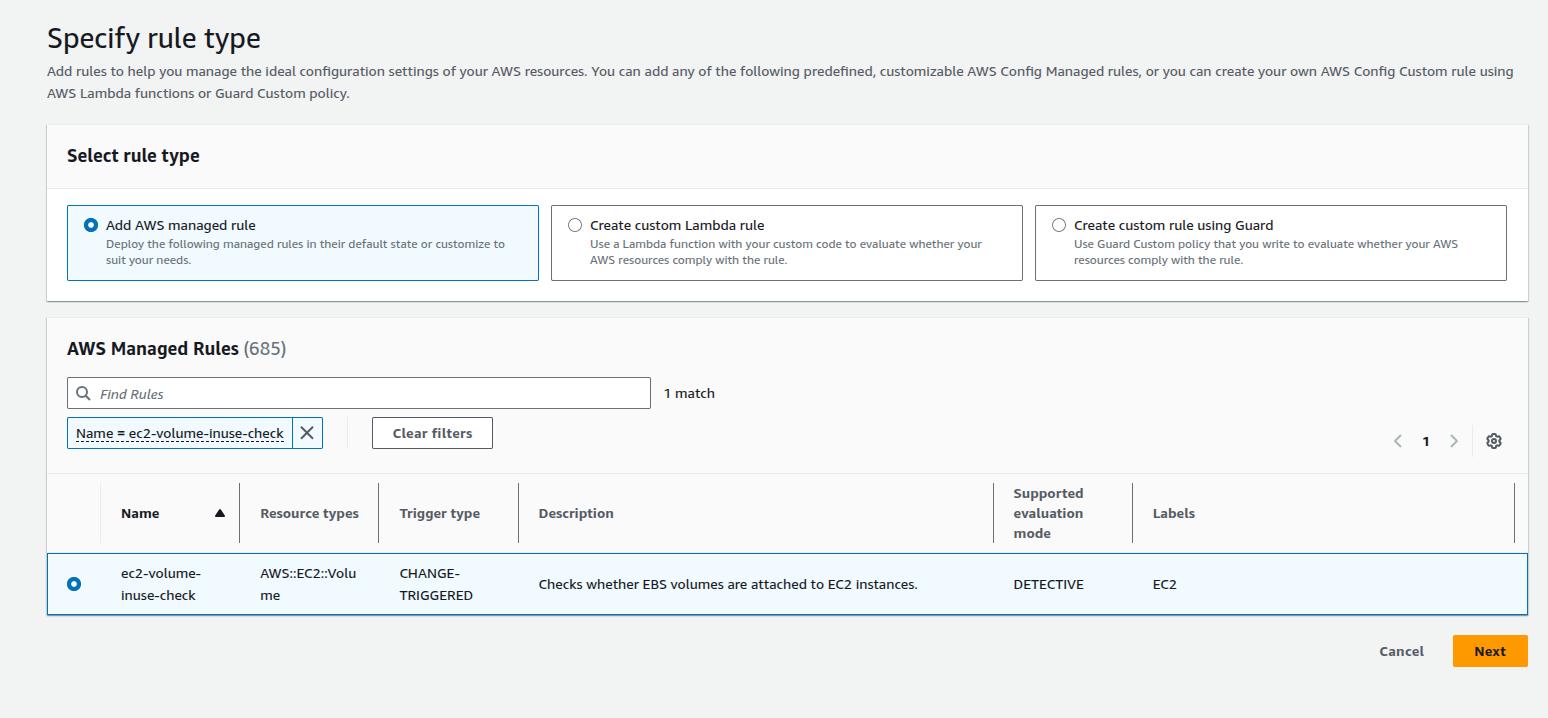

For EC2 compliance:

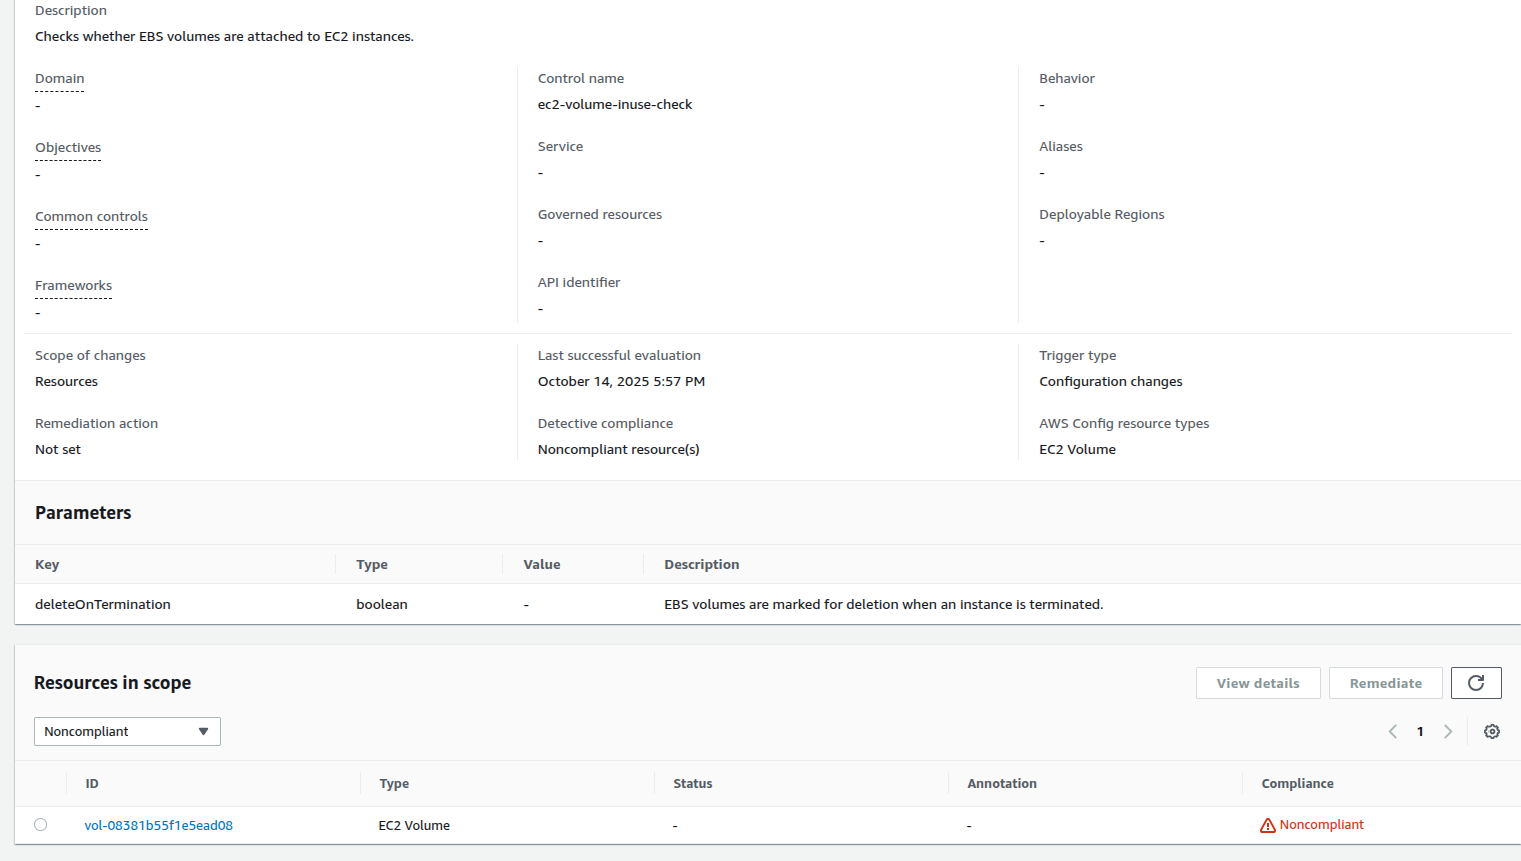


For required-tags compliance:

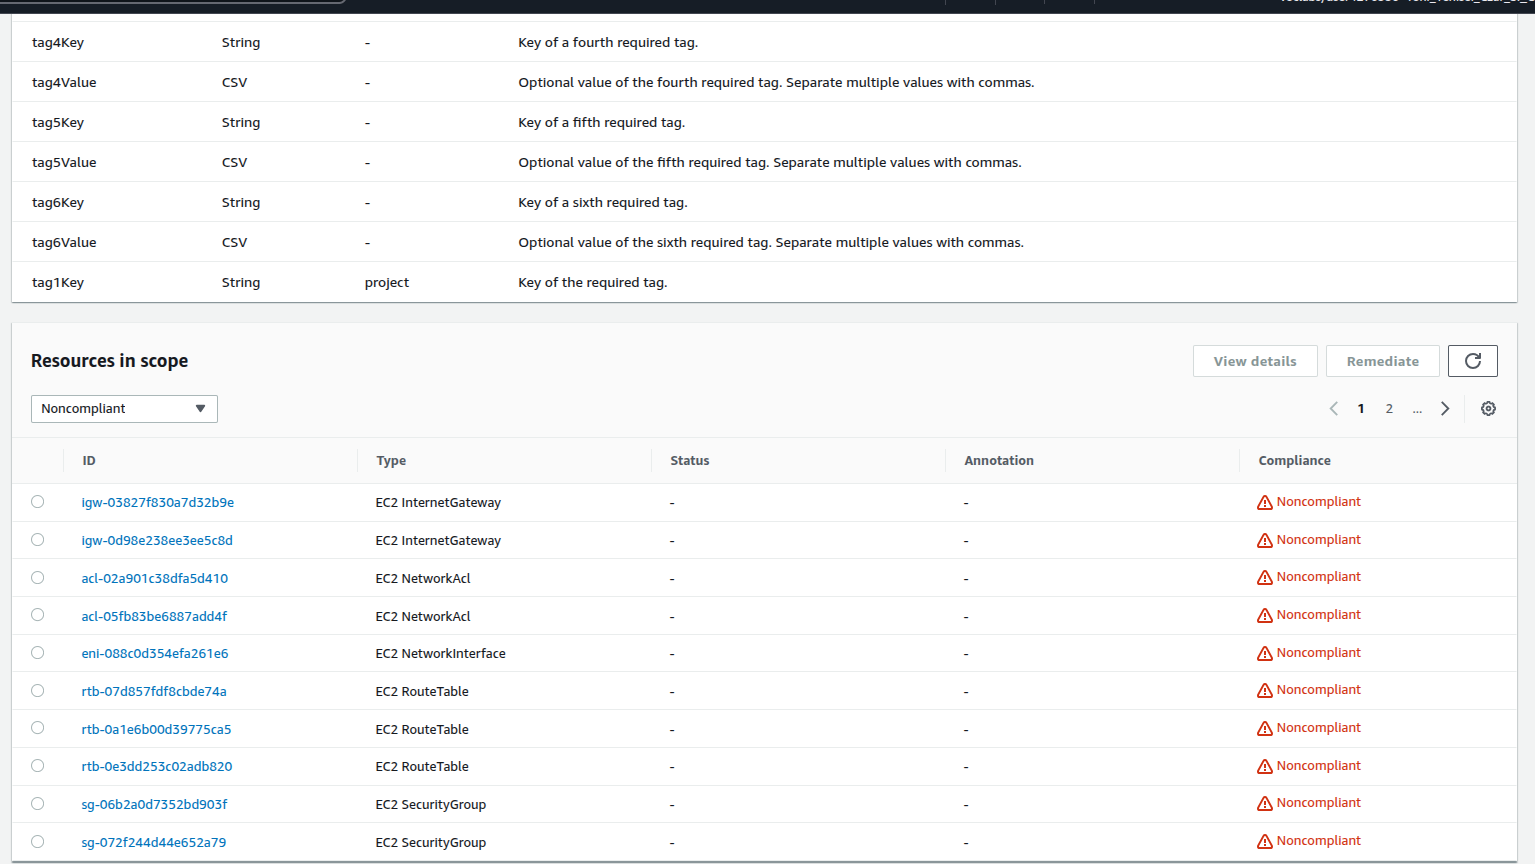